<a href="https://colab.research.google.com/github/tmckim/materials-sp24-colab/blob/main/lec_demos/lec21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Institute Visual Behavior 2P Dataset - Plotting Neural + **Behavioral** Data Demo


Today, we will continue to work with this dataset and plot additional behavioral variables along with the calcium signal from neurons recorded while mice performed a visual discrimination task.


This notebook will help us investigate data collected from the [Visual Behavior 2P](https://portal.brain-map.org/explore/circuits/visual-behavior-2p) dataset from the Allen Brain Institute.


____
# Learning Objectives

## At the end of this notebook, you'll be able to:
* Plot calcium imaging data based on experimental conditions 🔬 🔎 📈
* Examine the relationship between neuronal responses and beahvior 🧠 🏃 👀 💦
* Understand differences in data format  💭 📓
* Understand how to use common Python packages for data visualization 🐍 💻
* Apply best practices for plotting data 📊 📣
______

## Before you start - Save this notebook!

When you open a new Colab notebook from the WebCampus (like you hopefully did for this one), you cannot save changes. So it's  best to store the Colab notebook in your personal drive `"File > Save a copy in drive..."` **before** you do anything else.

The file will open in a new tab in your web browser, and it is automatically named something like: "**Copy of lec21.ipynb**". You can rename this to just the title of the assignment "**lec21.ipynb**". Make sure you do keep an informative name (like the name of the assignment) so that you know which files to submit back to WebCampus for grading! More instructions on this are at the end of the notebook.


**Where does the notebook get saved in Google Drive?**

By default, the notebook will be copied to a folder called “Colab Notebooks” at the root (home directory) of your Google Drive. If you use this for other courses or personal code notebooks, I recommend creating a folder for this course and then moving the assignments AFTER you have completed them. <br>

I also recommend you give the folder where you save your notebooks^ a different name than the folder we create below that will store the notebook resources you need each time you work through a course notebook. This includes any data files you will need, links to the images that appear in the notebook, and the files associated with the autograder for answer checking.<br>
You should select a name other than '**NS499-DataSci-course-materials**'. <br>
This folder gets overwritten with each assignment you work on in the course, so you should **NOT** store your notebooks in this folder that we use for course materials! <br><br>For example, you could create a folder called 'NS499-**notebooks**' or something along those lines.
___

# Allen Institute Visual Behavior 2P dataset:  Overview reminder
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task. In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.


# Dataset Notes

The entire dataset includes neural and behavioral measurements from:

*   107 mice 🐭
*   4787 behavior training sessions 👀
*   704 *in vivo* imaging sessions 🔬
*   50,482 cortical cells 🧠

The data are openly accessible, and include information about all recorded timeseries, behavioral events, and experimental data in a standard data format: [Neurodata Without Borders (NWB)](https://www.nwb.org/nwb-neurophysiology/).



In this notebook, we are going to focus on the relationship between neural data and behavior metrics.

![](https://allenswdb.github.io/_images/Trial_diagram.png)
<br>
Image [source](https://allenswdb.github.io/visual-behavior/VB-Behavior.html)

# Setup Steps

## Import Data and Files Needed - Optional

Only needed if we have to import the `tidy_df` later if it takes awhile to run the code.

In [ ]:
# Step 1
# Setup and add files needed to access gdrive
from google.colab import drive                                   # these lines mount your gdrive to access the files we import below
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# Step 2
# Change directory to the correct location in gdrive (modified way to do this from before)
import os
os.chdir('/content/gdrive/MyDrive/NS499-DataSci-course-materials/')

In [ ]:
# Step 3
# Remove the files that were previously there- we will replace with all the old + new ones for this assignment
!rm -r materials-sp24-colab

In [ ]:
# Step 4
# These lines clone (copy) all the files you will need from where I store the code+data for the course (github)
# Second part of the code copies the files to this location and folder in your own gdrive
!git clone https://github.com/tmckim/materials-sp24-colab '/content/gdrive/My Drive/NS499-DataSci-course-materials/materials-sp24-colab/'

In [ ]:
# Step 5
# Change directory into the folder where the resources for this assignment are stored in gdrive (modified way from before)
os.chdir('/content/gdrive/MyDrive/NS499-DataSci-course-materials/materials-sp24-colab/lec_demos/')

## Step 1: Import allensdk

In [1]:
!pip install allensdk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.3/336.3 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 94

## Step 2: Set up coding environment
Each time we start an analysis in Python, we must import the necessary code packages. If you're running this notebook in Colab, the cells below will install packages into your coding environment -- these are *not* installed on your computer.

### Import common packages
Below, we'll `import` a common selection of packages that will help us analyze and plot our data. We'll also configure the plotting in our notebook.

*   This will ensure that our coding environment has [NumPy](https://numpy.org/), [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/), and [Seaborn](https://seaborn.pydata.org/) installed.


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

import allensdk
import pkg_resources
print('allensdk version 2.10.2 or higher is required, you have {} installed'.format(pkg_resources.get_distribution("allensdk").version))

allensdk version 2.10.2 or higher is required, you have 2.16.2 installed


In [2]:
# Try to make notebook use full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>")) # output cells

In [3]:
# Define the path to the data we want to retrieve
output_dir = '/path/to/vbo'
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=output_dir)

ophys_session_table.csv: 100%|██████████| 247k/247k [00:00<00:00, 1.76MMB/s] 
behavior_session_table.csv: 100%|██████████| 1.59M/1.59M [00:00<00:00, 13.5MMB/s]
ophys_experiment_table.csv: 100%|██████████| 657k/657k [00:00<00:00, 4.21MMB/s] 
ophys_cells_table.csv: 100%|██████████| 4.28M/4.28M [00:00<00:00, 18.4MMB/s]
/usr/local/lib/python3.10/dist-packages/allensdk/brain_observatory/behavior/behavior_project_cache/behavior_project_cache.py:135: UpdatedStimulusPresentationTableWarning: 
	As of AllenSDK version 2.16.0, the latest Visual Behavior Ophys data has been significantly updated from previous releases. Specifically the user will need to update all processing of the stimulus_presentations tables. These tables now include multiple stimulus types delineated by the columns `stimulus_block` and `stimulus_block_name`.

The data that was available in previous releases are stored in the block name containing 'change_detection' and can be accessed in the pandas table by using: 
	`stimulus_

In [4]:
# get metadata tables
behavior_session_table = cache.get_behavior_session_table()
ophys_session_table = cache.get_ophys_session_table()
ophys_experiment_table = cache.get_ophys_experiment_table()

#print number of items in each table for all imaging and behavioral sessions
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(ophys_session_table)))
print('Number of ophys experiments = {}'.format(len(ophys_experiment_table)))

Number of behavior sessions = 4782
Number of ophys sessions = 703
Number of ophys experiments = 1936


* behavior session table: full training history of each mouse and is organized by `behavior_session_id`.
  * `Session_types` under 2P begin with `OPHYS_` and have an `ophys_session_id` if the data passed quality control and is available for analysis

In [ ]:
behavior_session_table

ophys_session_id ophys_container_id mouse_id indicator  \
behavior_session_id                                                           
870987812                        <NA>                NaN   457841   GCaMP6f   
872953842                        <NA>                NaN   457841   GCaMP6f   
873774125                        <NA>                NaN   457841   GCaMP6f   
874790261                        <NA>                NaN   457841   GCaMP6f   
875207834                        <NA>                NaN   457841   GCaMP6f   
...                               ...                ...      ...       ...   
993537991                   993512923        [991913246]   489066   GCaMP6f   
993691759                   993668836        [991913246]   489066   GCaMP6f   
993959724                   993948045        [991913246]   489066   GCaMP6f   
994710581                   994689422        [991913246]   489066   GCaMP6f   
994882261                   994868382        [991913246]   489066   GCaMP6f   

                                                     full_genotype  \
behavior_session_id                                                  
870987812            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
872953842            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
873774125            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
874790261            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
875207834            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
...                                                            ...   
993537991            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
993691759            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
993959724            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
994710581            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
994882261            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   

                        driver_line      cre_line               reporter_line  \
behavior_session_id                                                             
870987812            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
872953842            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
873774125            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
874790261            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
875207834            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
...                             ...           ...                         ...   
993537991            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
993691759            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
993959724            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
994710581            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
994882261            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   

                    sex  age_in_days  imaging_plane_group_count  \
behavior_session_id                                               
870987812             F           80                       <NA>   
872953842             F           84                       <NA>   
873774125             F           85                       <NA>   
874790261             F           86                       <NA>   
875207834             F           87                       <NA>   
...                  ..          ...                        ...   
993537991             F          128                       <NA>   
993691759             F          129                       <NA>   
993959724             F          130                       <NA>   
994710581             F          134                       <NA>   
994882261             F          135                       <NA>   

                                 project_code  \
behavior_session_id                             
870987812            VisualBehaviorMultiscope   
872953842

In [ ]:
behavior_session_table.shape

(4782, 34)

* ophys session table: metadata for each imaging session
  * organized by `ophys_session_id`

In [ ]:
ophys_session_table

behavior_session_id  \
ophys_session_id                        
951410079                   951520319   
952430817                   952554548   
954954402                   953982960   
955775716                   956010809   
957020350                   957032492   
...                               ...   
1038121306                 1038138169   
1038295095                 1038309505   
1038779134                 1038793248   
1039246790                 1039260737   
1039511589                 1039543061   

                                                 ophys_container_id mouse_id  \
ophys_session_id                                                               
951410079         [1018028339, 1018028342, 1018028345, 101802835...   457841   
952430817          [1018028339, 1018028345, 1018028354, 1018028357]   457841   
954954402         [1018028339, 1018028342, 1018028345, 101802835...   457841   
955775716                      [1018028339, 1018028342, 1018028345]   457841   
957020350         [1018028339, 1018028342, 1018028345, 101802835...   457841   
...                                                             ...      ...   
1038121306                                             [1036303886]   512458   
1038295095                                             [1036303886]   512458   
1038779134                                             [1036303886]   512458   
1039246790                                             [1036303886]   512458   
1039511589                                             [1036303886]   512458   

                 indicator                                      full_genotype  \
ophys_session_id                                                                
951410079          GCaMP6f      Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
952430817          GCaMP6f      Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
954954402          GCaMP6f      Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
955775716          GCaMP6f      Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
957020350          GCaMP6f      Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
...                    ...                                                ...   
1038121306         GCaMP6f  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
1038295095         GCaMP6f  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
1038779134         GCaMP6f  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
1039246790         GCaMP6f  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
1039511589         GCaMP6f  Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   

                                      driver_line           cre_line  \
ophys_session_id                                                       
951410079                          [Sst-IRES-Cre]       Sst-IRES-Cre   
952430817                          [Sst-IRES-Cre]       Sst-IRES-Cre   
954954402                          [Sst-IRES-Cre]       Sst-IRES-Cre   
955775716                          [Sst-IRES-Cre]       Sst-IRES-Cre   
957020350                          [Sst-IRES-Cre]       Sst-IRES-Cre   
...                                           ...                ...   
1038121306        [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre   
1038295095        [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre   
1038779134        [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre   
1039246790        [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre   
1039511589        [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre   

                               reporter_line sex  age_in_days  \
ophys_session_id                                                
951410079         Ai148(TIT2L-GC6f-ICL-tTA2)   F          206   
952430817         Ai148(TIT2L-GC6f-ICL-tTA2)   F          209   
954954402         Ai148(TIT2L-GC6f-ICL-tTA2)   F          210   
955775716         Ai148(TIT2L-GC6f-ICL-tTA2)   F          212   
957020350         Ai148(TIT2L-GC6f-ICL-tTA2)   F          213 

In [ ]:
ophys_session_table.shape

(703, 25)

* ophys experiment table: metadata for each imaging plane in each session
  * organized by `ophys_experiment_id`
  * includes all data as in the `ophys_session_table` + info specific to the imaging plane: `imaging_depth` and `targeted_structure`

In [ ]:
ophys_experiment_table


behavior_session_id  ophys_session_id  \
ophys_experiment_id                                          
951980471                      951520319         951410079   
951980473                      951520319         951410079   
951980475                      951520319         951410079   
951980479                      951520319         951410079   
951980481                      951520319         951410079   
...                                  ...               ...   
993590480                      993537991         993512923   
993862120                      993691759         993668836   
994053909                      993959724         993948045   
994791582                      994710581         994689422   
994956406                      994882261         994868382   

                     ophys_container_id mouse_id indicator  \
ophys_experiment_id                                          
951980471                    1018028342   457841   GCaMP6f   
951980473                    1018028345   457841   GCaMP6f   
951980475                    1018028339   457841   GCaMP6f   
951980479                    1018028354   457841   GCaMP6f   
951980481                    1018028357   457841   GCaMP6f   
...                                 ...      ...       ...   
993590480                     991913246   489066   GCaMP6f   
993862120                     991913246   489066   GCaMP6f   
994053909                     991913246   489066   GCaMP6f   
994791582                     991913246   489066   GCaMP6f   
994956406                     991913246   489066   GCaMP6f   

                                                     full_genotype  \
ophys_experiment_id                                                  
951980471            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980473            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980475            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980479            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980481            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
...                                                            ...   
993590480            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
993862120            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
994053909            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
994791582            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
994956406            Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   

                        driver_line      cre_line               reporter_line  \
ophys_experiment_id                                                             
951980471            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980473            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980475            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980479            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
951980481            [Sst-IRES-Cre]  Sst-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
...                             ...           ...                         ...   
993590480            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
993862120            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
994053909            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
994791582            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   
994956406            [Vip-IRES-Cre]  Vip-IRES-Cre  Ai148(TIT2L-GC6f-ICL-tTA2)   

                    sex  age_in_days  imaging_depth targeted_structure  \
ophys_experiment_id                                                      
951980471             F          206            150               VISp   
951980473             F          206            225               VISp   
951980475             F          206             75               VISp   
951980479             F          206            150               VISl  

In [ ]:
ophys_experiment_table.shape

(1936, 30)

## SST Neuron - is activity related to behavior?

Filter data to select subset - get `ophys_experiment_id`s corresponding to specific experimental conditions by filtering the table using the columns: <br>

* mice from the Sst-IRES-Cre Driver Line: `cre_line`
* `session_number` to identify experiments from the first session with the novel images
  * always has a `session_type` starting with `OPHYS_4`
  * use  abbreviated `session_number` column (agnostic to which specific image set was used)
* `prior_exposures_to_image_set`: select a session that was the first day with the novel image set (not a retake of the same `session_type`)

In [ ]:
# get all Sst experiments for ophys session 4 (novel images)
selected_experiment_table = ophys_experiment_table[(ophys_experiment_table.cre_line=='Sst-IRES-Cre')&
                        (ophys_experiment_table.session_number==4) &
                        (ophys_experiment_table.prior_exposures_to_image_set==0)]
print('Number of experiments: {}'.format(len(selected_experiment_table)))

Number of experiments: 58


Remember that any given experiment (defined by its ophys_experiment_id) contains data from only one imaging plane, in one session. There can be multiple experiments (imaging planes) recorded in the same imaging session if the multi-plane 2-photon microscope was used, but there can never be multiple sessions for a given ophys_experiment_id.

In [ ]:
print('Number of unique sessions: {}'.format(len(selected_experiment_table['ophys_session_id'].unique())))

Number of unique sessions: 19


We will randomly select data from an experiment- I've already pre-selected one below for us.

In [ ]:
# load the data for this ophys experiment from the cache
ophys_experiment_id = 957759570
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

behavior_ophys_experiment_957759570.nwb: 100%|██████████| 268M/268M [00:10<00:00, 26.5MMB/s]


The `get_behavior_ophys_experiment()` method returns a python object containing all data and metadata for the provided `ophys_experiment_id`.

In [ ]:
ophys_experiment.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 213,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_4_images_B',
 'date_of_acquisition': datetime.datetime(2019, 9, 27, 8, 58, 37, 5000, tzinfo=tzlocal()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('40897cd4-3279-4a2d-b65d-b3f984e34e17'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '457841',
 'project_code': 'VisualBehaviorMultiscope',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 957032492,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1018028354,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 150,
 'targeted_imaging_depth': 150,
 'imaging_plane_group': 2,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 957759570,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 957020350,
 'targeted_structure': 'VISl'}

In the next steps, we want to combine various sources of data into a single plot: <br>
* `dff_traces`
* `events`
* `running_speed`
* `pupil_area`
* `stimulus_presentations`

---
## Data Review: Images
`stimulus_presentations` has some NaN values. We need to remove those rows of the data because they correspond to other conditions we aren't interested in (initial_gray_screen_5min, natural_movie, etc)

In [ ]:
# review this data and see NaNs
ophys_experiment.stimulus_presentations

stimulus_block        stimulus_block_name  \
stimulus_presentations_id                                              
0                                       0   initial_gray_screen_5min   
1                                       1  change_detection_behavior   
2                                       1  change_detection_behavior   
3                                       1  change_detection_behavior   
4                                       1  change_detection_behavior   
...                                   ...                        ...   
13794                                   3          natural_movie_one   
13795                                   3          natural_movie_one   
13796                                   3          natural_movie_one   
13797                                   3          natural_movie_one   
13798                                   3          natural_movie_one   

                           image_index image_name  movie_frame_index  \
stimulus_presentations_id                                              
0                                  -99        NaN                -99   
1                                    0      im000                -99   
2                                    0      im000                -99   
3                                    0      im000                -99   
4                                    0      im000                -99   
...                                ...        ...                ...   
13794                              -99        NaN                895   
13795                              -99        NaN                896   
13796                              -99        NaN                897   
13797                              -99        NaN                898   
13798                              -99        NaN                899   

                             duration   start_time     end_time  start_frame  \
stimulus_presentations_id                                                      
0                          308.772448     0.000000   308.772448            0   
1                            0.250210   308.772448   309.022658        17985   
2                            0.250180   309.523058   309.773238        18030   
3                            0.250160   310.273688   310.523848        18075   
4                            0.250220   311.024258   311.274478        18120   
...                               ...          ...          ...          ...   
13794                        0.033340  4510.138358  4510.171698       269861   
13795                        0.033360  4510.171698  4510.205058       269863   
13796                        0.033370  4510.205058  4510.238428       269865   
13797                        0.033340  4510.238428  4510.271768       269867   
13798                        0.016710  4510.271768  4510.288478       269869   

                           end_frame  is_change  is_image_novel  omitted  \
stimulus_presentations_id                                                  
0                              17985      False            <NA>     <NA>   
1                              18000      False            True    False   
2                              18045      False            True    False   
3                              18090      False            True    False   
4                              18135      False            True    False   
...                              ...        ...             ...      ...   
13794                         269862      False            <NA>     <NA>   
13795                         269864      False            <NA>     <NA>   
13796                         269866      False            <NA>     <NA>   
13797                         269868      False            <NA>     <NA>   
13798                         269870      False            <NA>     <NA>   

                           movie_repeat  flashes_since_change  trials_id  \
stimulus_presentations_id                      

In [ ]:
# how many unique options are there?
ophys_experiment.stimulus_presentations['image_name'].unique()

array([nan, 'im000', 'im031', 'omitted', 'im054', 'im073', 'im106',
       'im075', 'im045', 'im035'], dtype=object)

To remove these from the data we will work with, there are multiple options:
1. Remove rows with NaNs in our column of interest
2. Filter based on the `stimulus_block_name` column for `change_detection_behavior`

In [ ]:
# 1: Select data that are not null (all except NaNs) in image_name col
# dataframe
all_stim = ophys_experiment.stimulus_presentations

# remove the Nans- effectively selecting only stimulus_block_name that is change_detection_behavior
all_stim = all_stim[all_stim['image_name'].notnull()]

Check the results before proceeding

In [ ]:
all_stim['image_name'].unique()

array(['im000', 'im031', 'omitted', 'im054', 'im073', 'im106', 'im075',
       'im045', 'im035'], dtype=object)

In [ ]:
all_stim['stimulus_block_name'].unique()

array(['change_detection_behavior'], dtype=object)

^ the `all_stim` dataframe is the one we will use in the code below

In [ ]:
# 2: Filter based on stimulus_block_name
# dataframe
stim = ophys_experiment.stimulus_presentations

# remove the Nans- effectively selecting only stimulus_block_name that is change_detection_behavior
stim_another_way = stim[stim['stimulus_block_name'] == 'change_detection_behavior']

Check the results before proceeding

In [ ]:
stim_another_way['image_name'].unique()

array(['im000', 'im031', 'omitted', 'im054', 'im073', 'im106', 'im075',
       'im045', 'im035'], dtype=object)

In [ ]:
stim_another_way['stimulus_block_name'].unique()

array(['change_detection_behavior'], dtype=object)

---
## Data Prep: Defining Colors for Each Image
Data preparation for plotting- we will add a list of colors for each image. This will appear as a vertical bar on our plots to indicate the time the image was shown, and to visually identify when images changed or stayed the same.

In [ ]:
#@title Hidden Code
# create a list of all unique stimuli presented in this experiment
unique_stimuli = [stimulus for stimulus in all_stim['image_name'].unique()]

# create a colormap with each unique image having its own color
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = (1,1,1) # set omitted stimulus to white color

# add the colors for each image to the stimulus presentations table in the dataset
stimulus_presentations = all_stim
stimulus_presentations['color'] = all_stim['image_name'].map(lambda image_name: colormap[image_name])

This is new and something we haven't covered: [list comprehension](https://www.geeksforgeeks.org/python-list-comprehension/)

## Walk through of the above cells- Optional

In [ ]:
# create a list of all unique stimuli presented in this experiment
unique_stimuli = [stimulus for stimulus in all_stim['image_name'].unique()]
unique_stimuli

['im000',
 'im031',
 'omitted',
 'im054',
 'im073',
 'im106',
 'im075',
 'im045',
 'im035']

In [ ]:
# create a colormap with each unique image having its own color- this is a dict
# note here we also use seaborn color palettes - sns
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap

{'im000': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'im031': (1.0, 0.4980392156862745, 0.054901960784313725),
 'im035': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'im045': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'im054': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'im073': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'im075': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'im106': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'omitted': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)}

In [ ]:
colormap['omitted'] = (1,1,1) # set omitted stimulus to white color
colormap

{'im000': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'im031': (1.0, 0.4980392156862745, 0.054901960784313725),
 'im035': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'im045': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'im054': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'im073': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'im075': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'im106': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'omitted': (1, 1, 1)}

These lines are also advanced and topics we haven't covered. `lambda` is used for an [anonymous function](https://www.geeksforgeeks.org/python-list-comprehension/) along with the [`.map`](https://pandas.pydata.org/docs/dev/reference/api/pandas.DataFrame.map.html) method in `pandas`

In [ ]:
# add the colors for each image to the stimulus presentations table in the dataset
stimulus_presentations = all_stim
stimulus_presentations['color'] = all_stim['image_name'].map(lambda image_name: colormap[image_name])

## Review Data: New Color Column
You can review the dataframe `stimulus_presentations` to see what we did- we added a color column that has color info depending on the image.

In [ ]:
stimulus_presentations

stimulus_block        stimulus_block_name  \
stimulus_presentations_id                                              
1                                       1  change_detection_behavior   
2                                       1  change_detection_behavior   
3                                       1  change_detection_behavior   
4                                       1  change_detection_behavior   
5                                       1  change_detection_behavior   
...                                   ...                        ...   
4793                                    1  change_detection_behavior   
4794                                    1  change_detection_behavior   
4795                                    1  change_detection_behavior   
4796                                    1  change_detection_behavior   
4797                                    1  change_detection_behavior   

                           image_index image_name  movie_frame_index  \
stimulus_presentations_id                                              
1                                    0      im000                -99   
2                                    0      im000                -99   
3                                    0      im000                -99   
4                                    0      im000                -99   
5                                    0      im000                -99   
...                                ...        ...                ...   
4793                                 7      im035                -99   
4794                                 7      im035                -99   
4795                                 7      im035                -99   
4796                                 7      im035                -99   
4797                                 7      im035                -99   

                           duration   start_time     end_time  start_frame  \
stimulus_presentations_id                                                    
1                           0.25021   308.772448   309.022658        17985   
2                           0.25018   309.523058   309.773238        18030   
3                           0.25016   310.273688   310.523848        18075   
4                           0.25022   311.024258   311.274478        18120   
5                           0.25021   311.774888   312.025098        18165   
...                             ...          ...          ...          ...   
4793                        0.25021  3906.295048  3906.545258       233660   
4794                        0.25020  3907.045668  3907.295868       233705   
4795                        0.25022  3907.796278  3908.046498       233750   
4796                        0.25020  3908.546878  3908.797078       233795   
4797                        0.25020  3909.297508  3909.547708       233840   

                           end_frame  is_change  is_image_novel  omitted  \
stimulus_presentations_id                                                  
1                              18000      False            True    False   
2                              18045      False            True    False   
3                              18090      False            True    False   
4                              18135      False            True    False   
5                              18180      False            True    False   
...                              ...        ...             ...      ...   
4793                          233675      False            True    False   
4794                          233720      False            True    False   
4795                          233765      False            True    False   
4796                          233810      False            True    False   
4797                          233855      False            True    False   

                           movie_repeat  flashes_since_change  trials_id  \
stimulus_presentations_id                                                

## Define Plotting Functions

This is code to define individual functions for each type of the data we want to plot: <br>
* `dff_traces` - calcium florescence signal
* `events` - timing and magnitude of calcium signals
  * exclude prolonged calcium transients that may contaminate neural responses to subsequent stimuli
* `running speed` - running speed (cm/s)
* `pupil area` - pupil area (px sq)
* `licks` - timing of licking behavior
* `rewards` - timing of reward delivery
* `stimuli` - color coded images for plot

This enables us to just reuse the code to make the plot below, but select different cells to plot!


In [ ]:
#@title Hidden Functions
# function to plot dff traces
def plot_dff_trace(ax, cell_specimen_id, initial_time, final_time):
    '''
        ax: axis on which to plot
        cell_specimen_id: id of the cell to plot
        intial_time: initial time to plot from
        final_time: final time to plot to
    '''
    # create a dataframe using dff trace from one selected cell
    data = {'dff': ophys_experiment.dff_traces.loc[cell_specimen_id]['dff'],
        'timestamps': ophys_experiment.ophys_timestamps}
    df = pd.DataFrame(data)
    dff_trace_sample = df[(df.timestamps >= initial_time) & (df.timestamps <= final_time)]
    ax.plot(dff_trace_sample['timestamps'], dff_trace_sample['dff']/dff_trace_sample['dff'].max())

# function to plot events traces
def plot_events_trace(ax, cell_specimen_id, initial_time, final_time):
    # create a dataframe using events trace from one selected cell
    data = {'events': ophys_experiment.events.loc[cell_specimen_id].events,
        'timestamps': ophys_experiment.ophys_timestamps}
    df = pd.DataFrame(data)
    events_trace_sample = df[(df.timestamps >= initial_time) & (df.timestamps <= final_time)]
    ax.plot(events_trace_sample['timestamps'], events_trace_sample['events']/events_trace_sample['events'].max())

# function to plot running speed
def plot_running(ax, initial_time, final_time):
    running_sample = ophys_experiment.running_speed.copy()
    running_sample = running_sample[(running_sample.timestamps >= initial_time) & (running_sample.timestamps <= final_time)]
    ax.plot(running_sample['timestamps'], running_sample['speed']/running_sample['speed'].max(),
            '--', color = 'gray', linewidth = 1)

# function to plot pupil diameter
def plot_pupil(ax, initial_time, final_time):
    pupil_sample = ophys_experiment.eye_tracking.copy()
    pupil_sample = pupil_sample[(pupil_sample.timestamps >= initial_time) &
                                (pupil_sample.timestamps <= final_time)]
    ax.plot(pupil_sample['timestamps'], pupil_sample['pupil_width']/pupil_sample['pupil_width'].max(),
            color = 'gray', linewidth = 1)

# function to plot licks
def plot_licks(ax, initial_time, final_time):
    licking_sample = ophys_experiment.licks.copy()
    licking_sample = licking_sample[(licking_sample.timestamps >= initial_time) &
                                    (licking_sample.timestamps <= final_time)]
    ax.plot(licking_sample['timestamps'], np.zeros_like(licking_sample['timestamps']),
            marker = 'o', markersize = 3, color = 'black', linestyle = 'none')

# function to plot rewards
def plot_rewards(ax, initial_time, final_time):
    rewards_sample = ophys_experiment.rewards.copy()
    rewards_sample = rewards_sample[(rewards_sample.timestamps >= initial_time) &
                                    (rewards_sample.timestamps <= final_time)]
    ax.plot(rewards_sample['timestamps'], np.zeros_like(rewards_sample['timestamps']),
            marker = 'd', color = 'blue', linestyle = 'none', markersize = 12, alpha = 0.5)

# function to plot stimuli
def plot_stimuli(ax, initial_time, final_time):
    stimulus_presentations_sample = stimulus_presentations.copy()
    stimulus_presentations_sample = stimulus_presentations_sample[(stimulus_presentations_sample.end_time >= initial_time) & (stimulus_presentations_sample.start_time <= final_time)]
    for idx, stimulus in stimulus_presentations_sample.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=stimulus['color'], alpha=0.25)

In [ ]:
# get list of cell_specimen_ids using the index of cell_specimen_table- we choose one below
cell_specimen_ids = ophys_experiment.cell_specimen_table.index.values
cell_specimen_ids

array([1086607071, 1086607143, 1086607340, 1086607562, 1086608432,
       1086610383, 1086607814, 1086608913, 1086608195, 1086607431,
       1086607903, 1086609334, 1086606974, 1086607195, 1086608294,
       1086610611, 1086608811, 1086608379, 1086610696, 1086608491,
       1086609380, 1086608577, 1086608630])

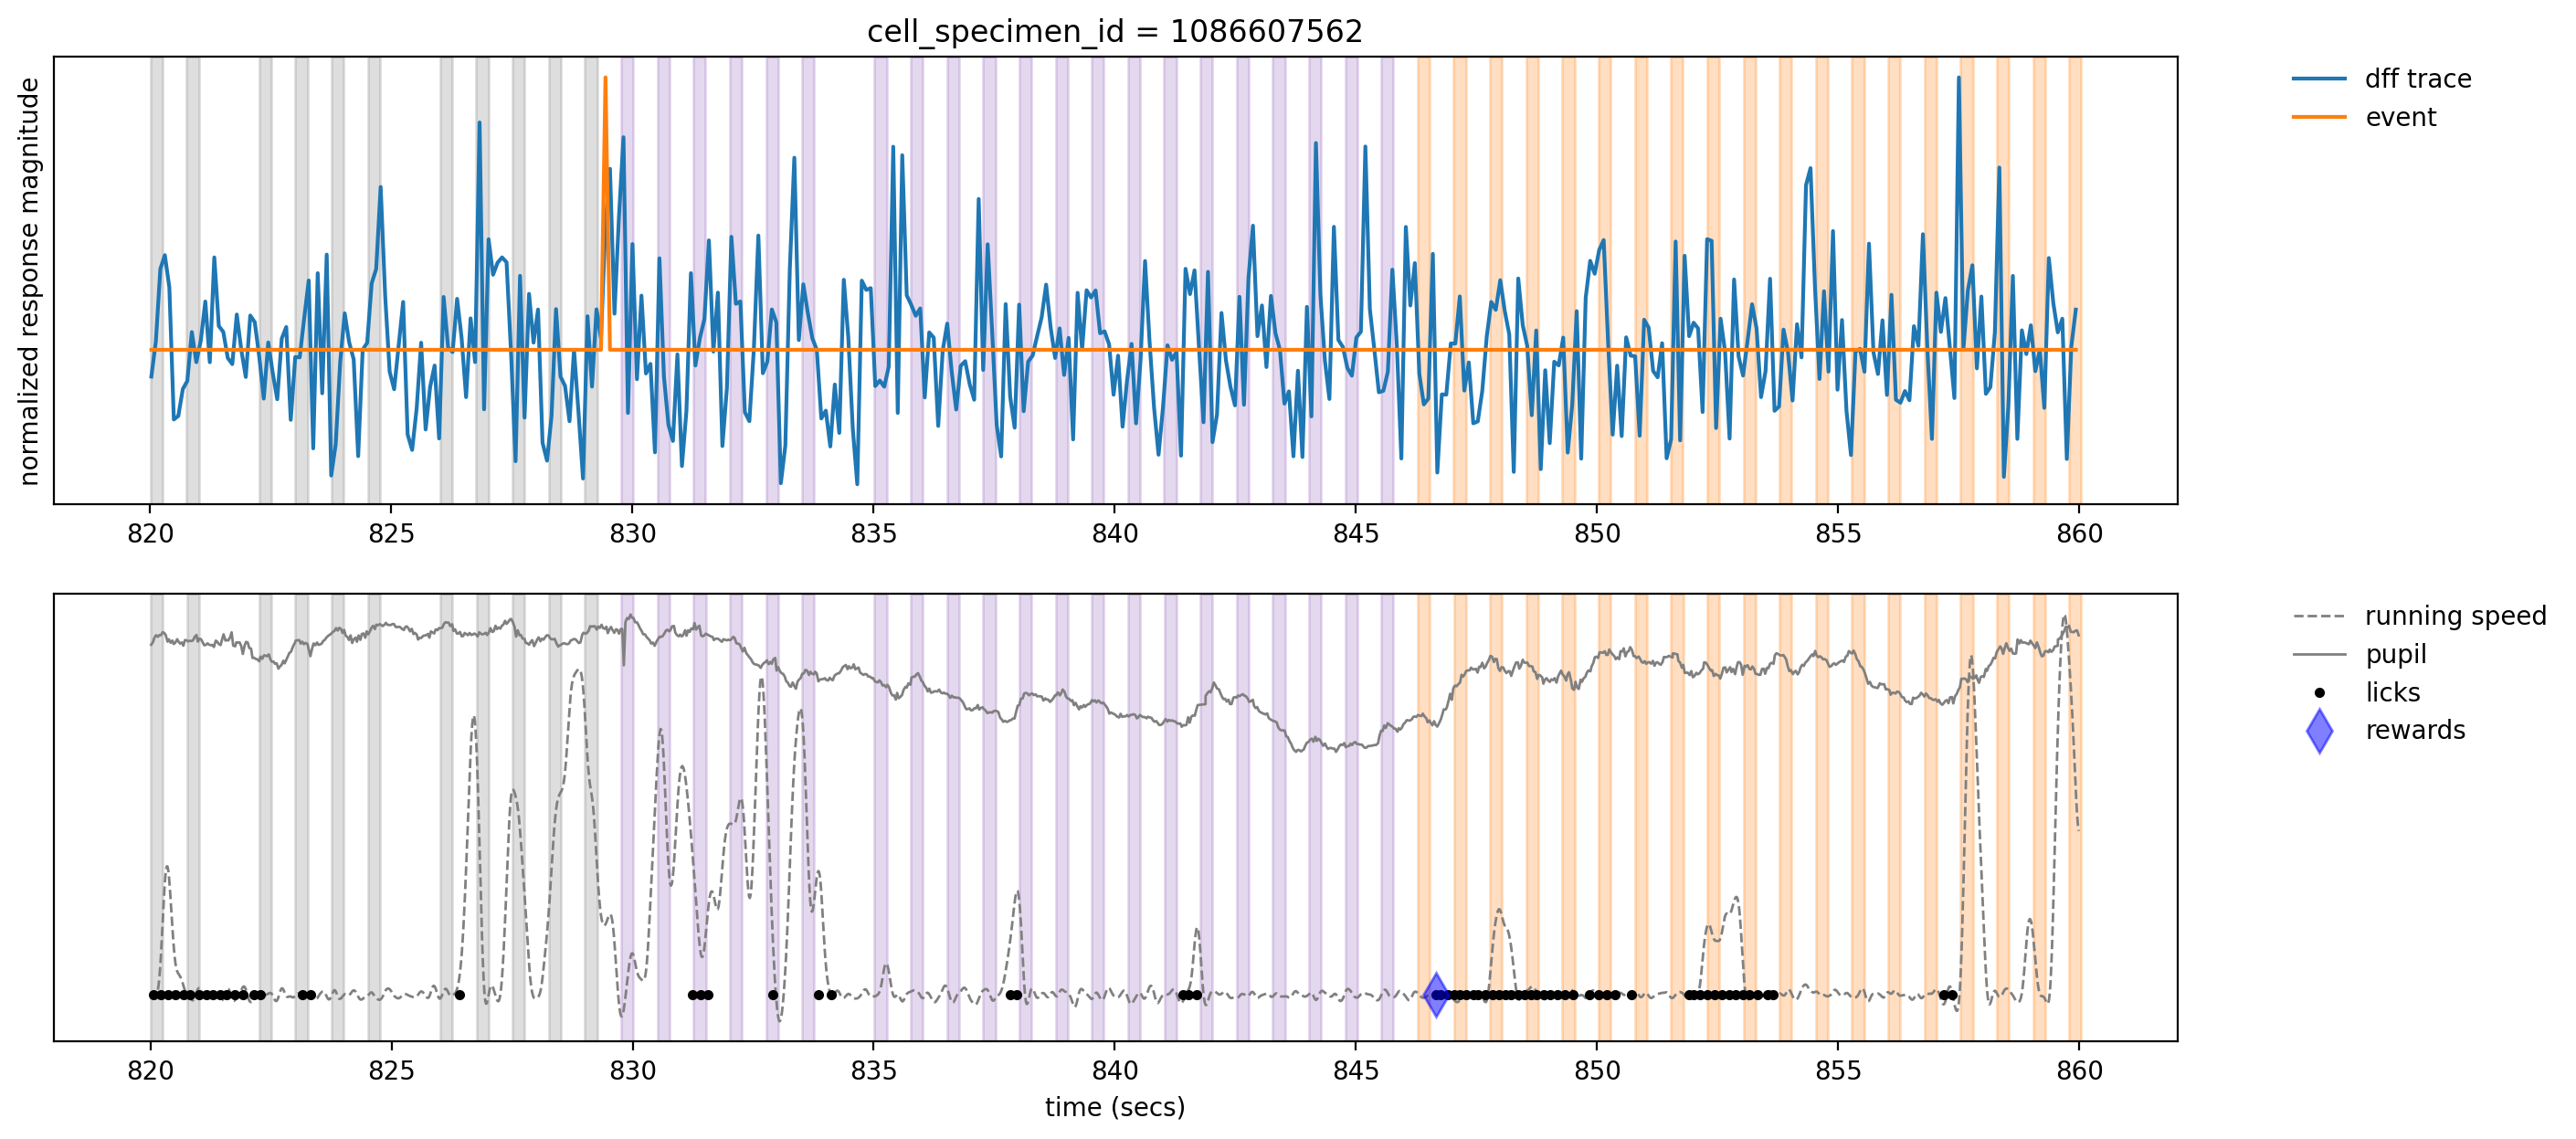

In [ ]:
# Plotting code
initial_time = 820 # start time in seconds
final_time = 860 # stop time in seconds

fig, ax = plt.subplots(2,1,figsize = (15,7))

plot_dff_trace(ax[0], cell_specimen_ids[3], initial_time, final_time)
plot_events_trace(ax[0], cell_specimen_ids[3], initial_time, final_time)
plot_stimuli(ax[0], initial_time, final_time)
ax[0].set_ylabel('normalized response magnitude')
ax[0].set_yticks([])
ax[0].set_title('cell_specimen_id = '+str(cell_specimen_ids[3]))
ax[0].legend(['dff trace', 'event'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon = False)

plot_running(ax[1], initial_time, final_time)
plot_pupil(ax[1], initial_time, final_time)
plot_licks(ax[1], initial_time, final_time)
plot_rewards(ax[1], initial_time, final_time)
plot_stimuli(ax[1], initial_time, final_time)

ax[1].set_yticks([])
ax[1].set_xlabel('time (secs)')
ax[1].legend(['running speed', 'pupil','licks', 'rewards'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon = False);

In [ ]:
#@title Task
from IPython.display import HTML

alert_info = '''
<div style= "font-size: 20px"; class="alert alert-info" role="alert">
  <h4 class="alert-heading">Task</h4>
What do you see in this plot? </div>
'''

display(HTML('<link href="https://nbviewer.org/static/build/styles.css" rel="stylesheet">'))
display(HTML(alert_info))

In [ ]:
#@title Hidden
# This SST neuron (13-14 minutes into session)::
# active during our experiment but its activity does not appear to be reliably locked to image presentations
# might follow animal's running speed - could be modulated by running instead

---
## Which images were shown on the trials above?

What if we want to know which images were shown here?

In [ ]:
 # from the stimulus presentation function to plot
stimulus_presentations_plot = stimulus_presentations.copy()
stimulus_presentations_plot = stimulus_presentations_plot[(stimulus_presentations_plot.end_time >= initial_time) & (stimulus_presentations_plot.start_time <= final_time)]
stimulus_presentations_plot.image_name.unique()

array(['im106', 'omitted', 'im054', 'im031'], dtype=object)

Here is the table with this info- we an then use indices to find the data to plot for each image.

In [ ]:
ophys_experiment.stimulus_templates

unwarped  \
image_name                                                      
im000       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im106       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im075       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im073       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im045       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im054       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im031       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im035       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                                       warped  
image_name                                                     
im000       [[122, 122, 123, 125, 126, 127, 128, 129, 130,...  
im106       [[108, 109, 106, 103, 102, 104, 107, 112, 117,...  
im075       [[120, 121, 121, 121, 122, 123, 123, 122, 121,...  
im073       [[120, 120, 118, 116, 116, 119, 121, 120, 117,...  
im045       [[10, 13, 6, 0, 0, 8, 15, 13, 6, 2, 4, 9, 12, ...  
im054       [[124, 125, 127, 130, 133, 134, 136, 138, 140,...  
im031       [[233, 234, 244, 253, 253, 244, 237, 239, 246,...  
im035       [[178, 181, 189, 198, 200, 198, 196, 199, 205,...

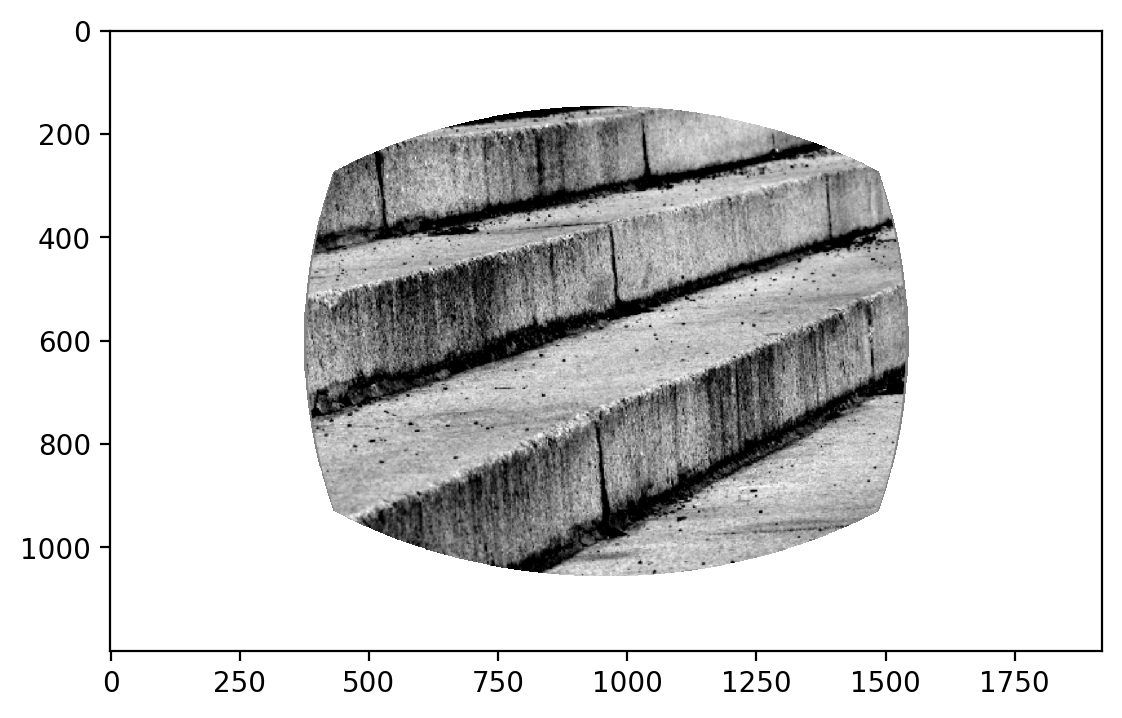

In [ ]:
# im106 is index 1
stimulus_templates = ophys_experiment.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[1]]['unwarped'], cmap='gray');

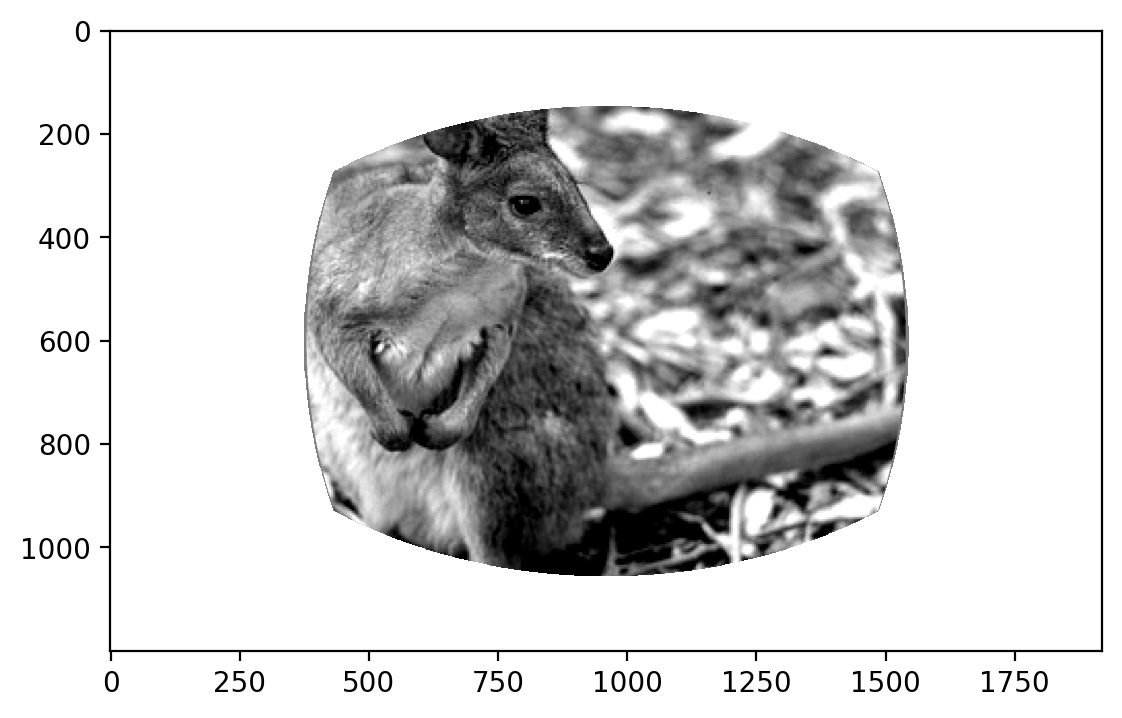

In [ ]:
# im054 is index 5
stimulus_templates = ophys_experiment.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[5]]['unwarped'], cmap='gray');

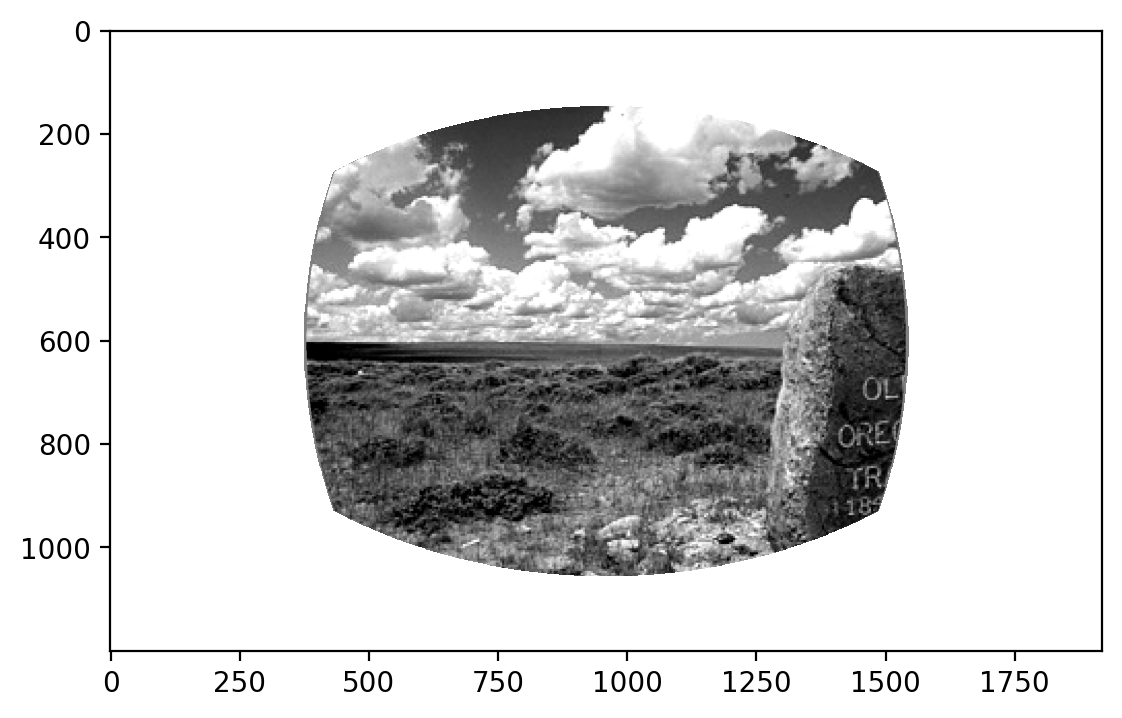

In [ ]:
# im031 is index 6
stimulus_templates = ophys_experiment.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[6]]['unwarped'], cmap='gray');

## Dff vs events

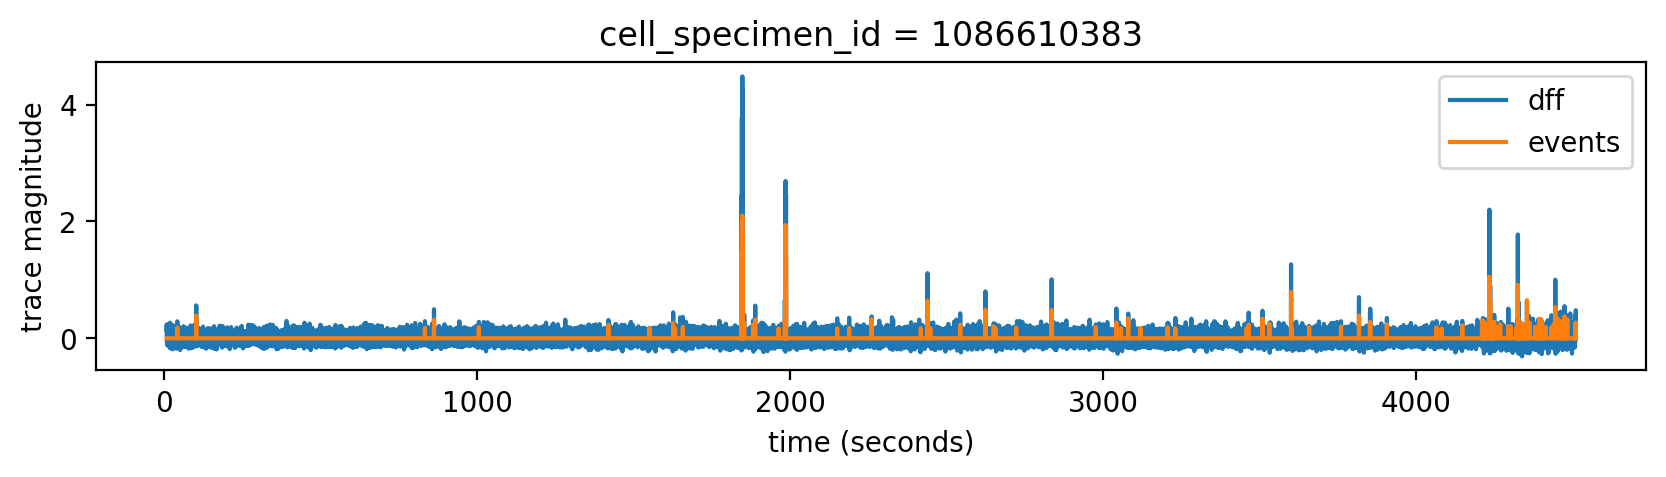

In [ ]:
#@title Hidden Code - dff and events
# plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1,1, figsize = (10,2))
ax.plot(ophys_experiment.ophys_timestamps, ophys_experiment.dff_traces.loc[cell_specimen_id, 'dff'], label='dff')
ax.plot(ophys_experiment.ophys_timestamps, ophys_experiment.events.loc[cell_specimen_id, 'events'], label='events')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('cell_specimen_id = '+str(cell_specimen_id))
ax.legend();

---
## VIP Neuron - is activity related to behavior?

Filter data to select subset - get `ophys_experiment_id`s corresponding to specific experimental conditions by filtering the table using the columns: <br>

* mice from the Vip-IRES-Cre Driver Line: `cre_line`
* `session_number` to identify experiments from the first session with the novel images
  * always has a `session_type` starting with `OPHYS_1`
  * use  abbreviated `session_number` column (agnostic to which specific image set was used)

This will differ from the previous as we will pick from a session with `familiar` images

In [ ]:
# Select a Vip experiment with familiar images (session_number = 1, 2, or 3)
selected_experiment_table = ophys_experiment_table[(ophys_experiment_table.cre_line=='Vip-IRES-Cre')&
                        (ophys_experiment_table.session_number==1)]

# load the experiment data from the cache
ophys_experiment = cache.get_behavior_ophys_experiment(selected_experiment_table.index.values[1])
# get the cell IDs
cell_specimen_ids = ophys_experiment.cell_specimen_table.index.values # a list of all cell ids

behavior_ophys_experiment_826587940.nwb: 100%|██████████| 370M/370M [00:15<00:00, 24.6MMB/s]


---
## Data Prep: Defining Colors for Each Image
Review `stimulus_presentations` because some values are NaN. We need to remove those rows of the data because they correspond to other conditions we aren't interested in (initial_gray_screen_5min, natural_movie, etc)

In [ ]:
# dataframe from the metadata
new_stim = ophys_experiment.stimulus_presentations

# remove the Nans- effectively selecting only stimulus_block_name that is change_detection_behavior
new_stim = new_stim[new_stim['image_name'].notnull()]

In [ ]:
# same as above- all in one cell now

# create a list of all unique stimuli presented in this experiment
unique_stimuli = [stimulus for stimulus in new_stim['image_name'].unique()]

# create a colormap with each unique image having its own color
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = (1,1,1) # set omitted stimulus to white color

# add the colors for each image to the stimulus presentations table in the dataset
stimulus_presentations = new_stim
stimulus_presentations['color'] = new_stim['image_name'].map(lambda image_name: colormap[image_name])

## Plotting Neural Activity & Behavior
Now we plot! Our functions were already defined above, so can just be called here

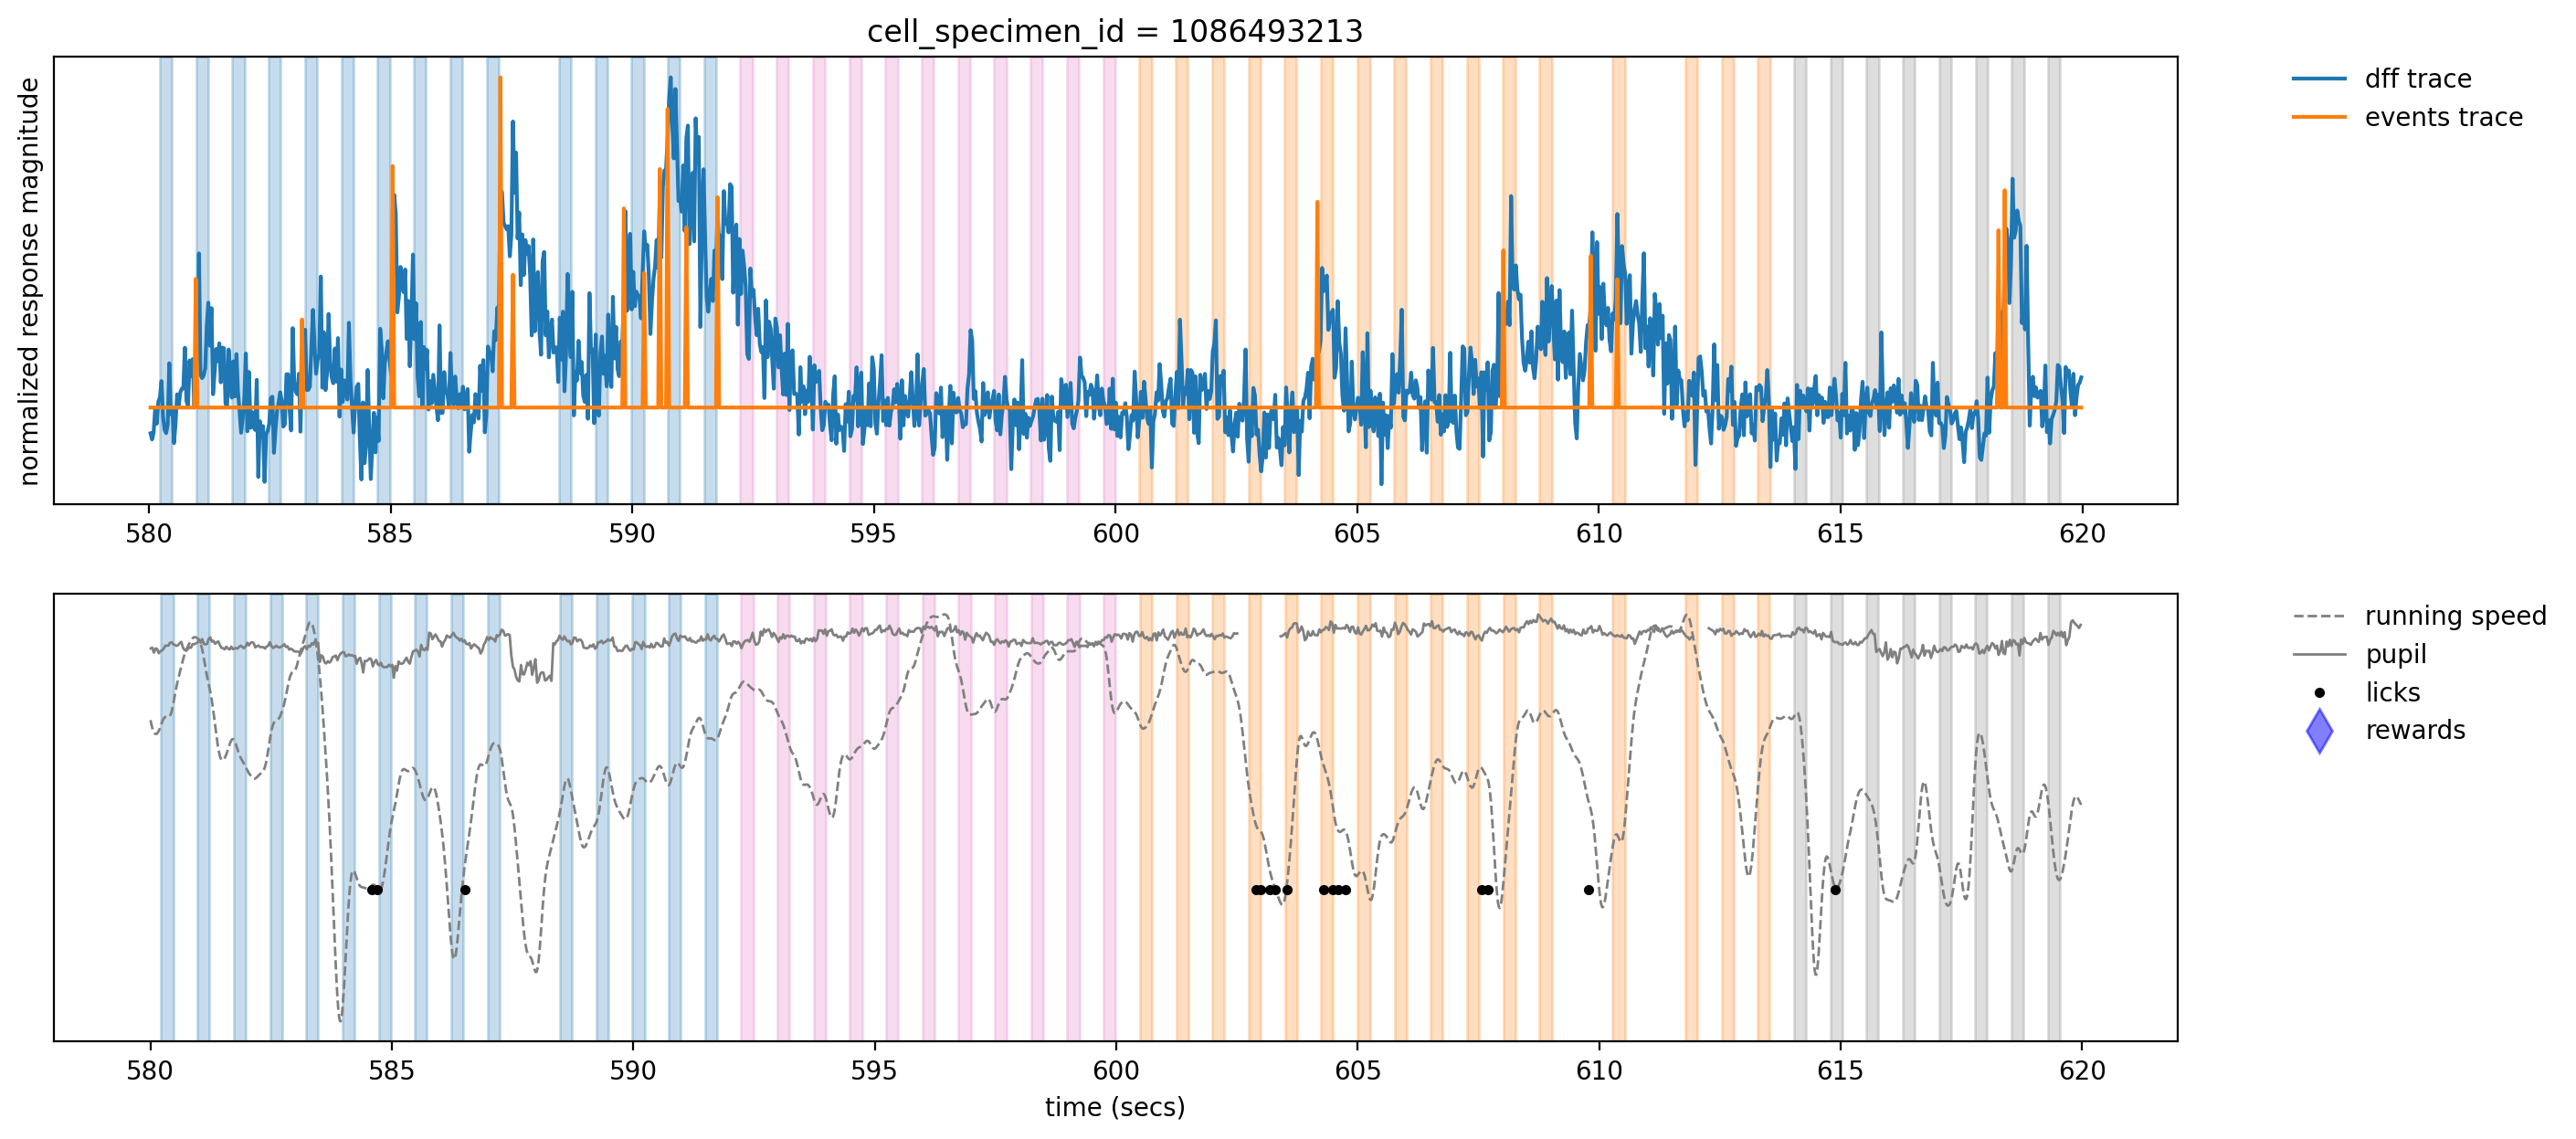

In [ ]:
# we can plot the same information for a different cell in the dataset
initial_time = 580 # start time in seconds
final_time = 620 # stop time in seconds
fig, ax = plt.subplots(2,1,figsize = (15,7))

plot_dff_trace(ax[0], cell_specimen_ids[5], initial_time, final_time)
plot_events_trace(ax[0], cell_specimen_ids[5], initial_time, final_time)
plot_stimuli(ax[0], initial_time, final_time)
ax[0].set_ylabel('normalized response magnitude')
ax[0].set_yticks([])
ax[0].set_title('cell_specimen_id = '+str(cell_specimen_ids[5]))
ax[0].legend(['dff trace', 'events trace'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon = False)

plot_running(ax[1], initial_time, final_time)
plot_pupil(ax[1], initial_time, final_time)
plot_licks(ax[1], initial_time, final_time)
plot_rewards(ax[1], initial_time, final_time)
plot_stimuli(ax[1], initial_time, final_time)

ax[1].set_yticks([])
ax[1].set_xlabel('time (secs)')
ax[1].legend(['running speed', 'pupil','licks', 'rewards'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, frameon = False);

In [ ]:
#@title Hidden
# This VIP neuron (9-10 minutes into session):
# active during our experiment but its activity does not appear to be reliably locked to image presentations as well
# Aligning neural activity to different behavioral or experimental events might reveal what this neuron is driven by

---
## Which images were shown on the trials above?
What if we want to know which images were shown here?

In [ ]:
 # from the stimulus presentation function to plot
stimulus_presentations_plot = stimulus_presentations.copy()
stimulus_presentations_plot = stimulus_presentations_plot[(stimulus_presentations_plot.end_time >= initial_time) & (stimulus_presentations_plot.start_time <= final_time)]
stimulus_presentations_plot.image_name.unique()

array(['im061', 'omitted', 'im077', 'im062', 'im085'], dtype=object)

Here is the table with this info- we an then use indices to find the data to plot for each image.

In [ ]:
ophys_experiment.stimulus_templates

unwarped  \
image_name                                                      
im065       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im077       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im066       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im061       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im063       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im062       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im085       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   
im069       [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...   

                                                       warped  
image_name                                                     
im065       [[198, 197, 201, 207, 207, 202, 198, 201, 207,...  
im077       [[129, 135, 140, 142, 140, 135, 129, 124, 117,...  
im066       [[83, 85, 82, 78, 78, 81, 84, 84, 82, 82, 84, ...  
im061       [[125, 126, 126, 126, 125, 125, 125, 125, 125,...  
im063       [[105, 108, 107, 101, 97, 96, 98, 101, 103, 10...  
im062       [[103, 103, 103, 105, 112, 125, 145, 172, 204,...  
im085       [[54, 56, 50, 45, 45, 51, 56, 55, 51, 48, 49, ...  
im069       [[251, 248, 255, 255, 255, 254, 246, 248, 255,...

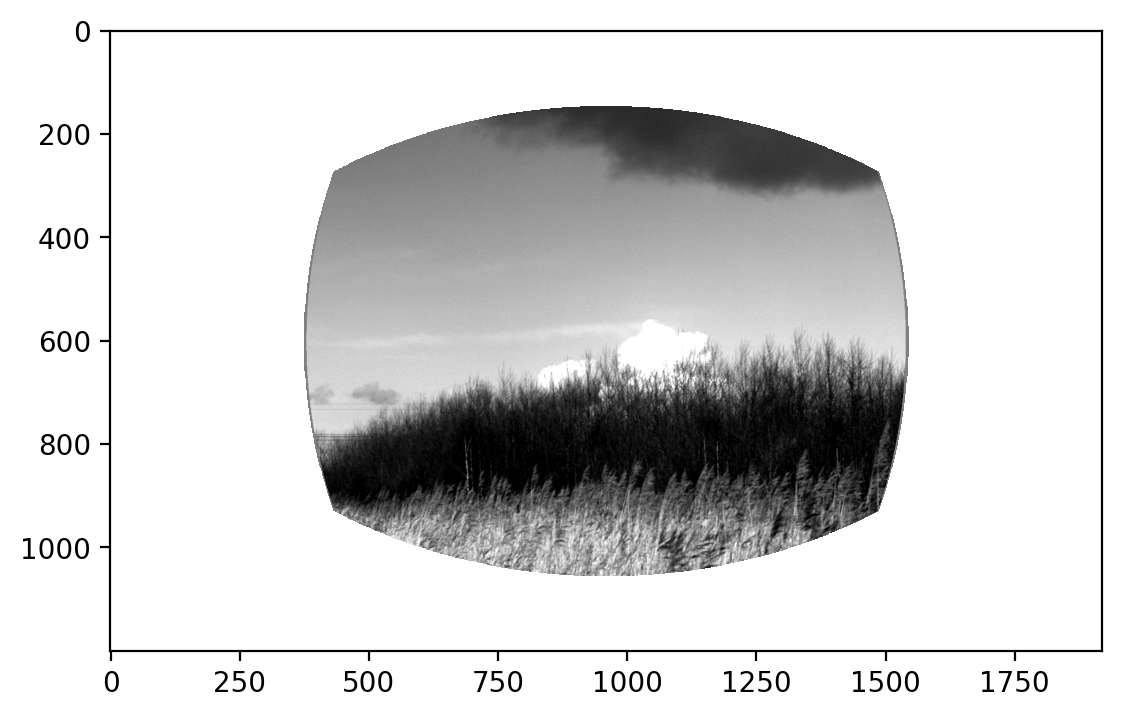

In [ ]:
# im061 is index 3
stimulus_templates = ophys_experiment.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[3]]['unwarped'], cmap='gray');

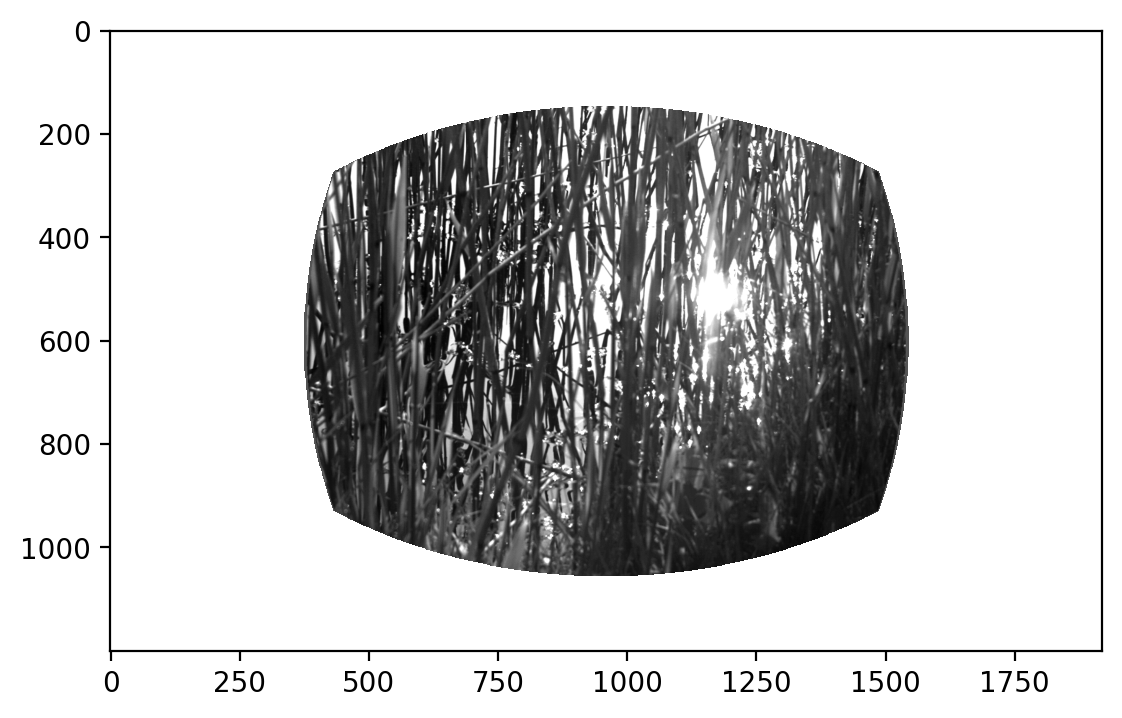

In [ ]:
# im077 is index 1
stimulus_templates = ophys_experiment.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[1]]['unwarped'], cmap='gray');

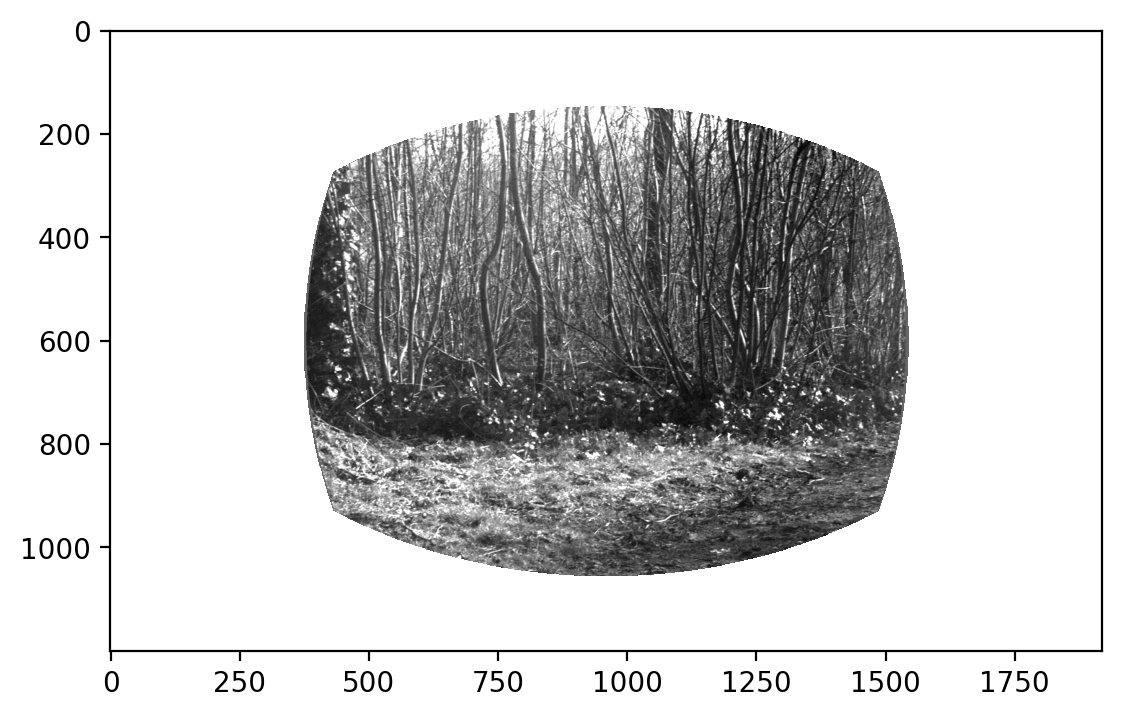

In [ ]:
# im062 is index 5
stimulus_templates = ophys_experiment.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[5]]['unwarped'], cmap='gray');

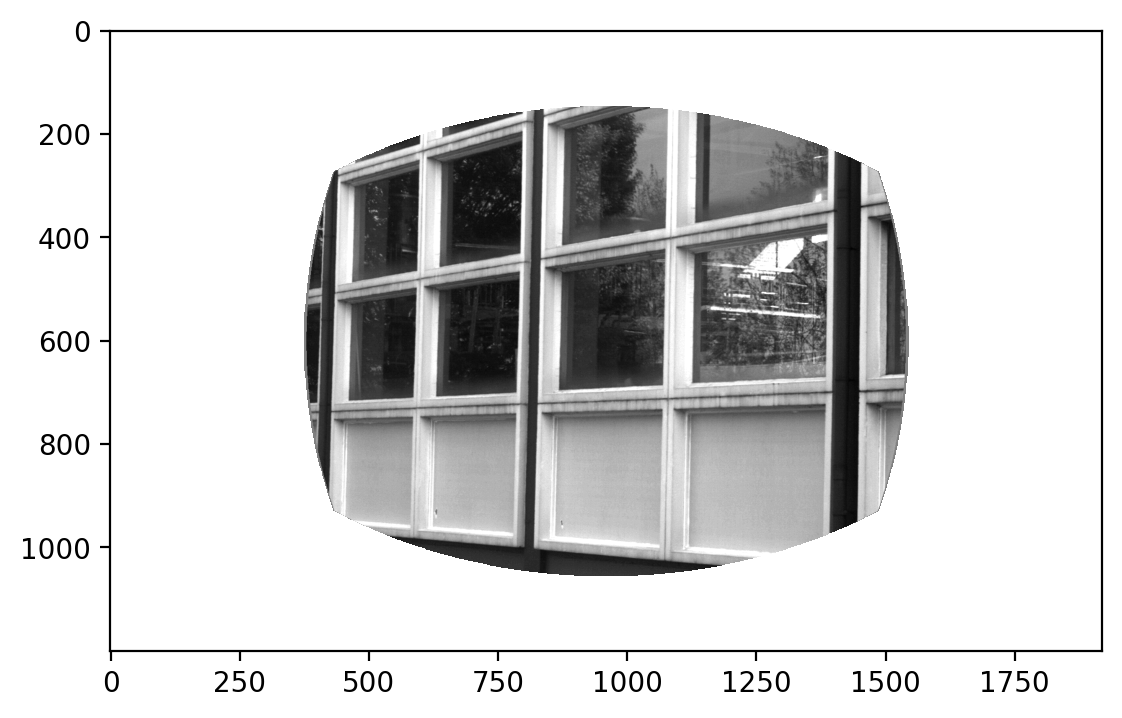

In [ ]:
# im085 is index 6
stimulus_templates = ophys_experiment.stimulus_templates.copy()
stimuli = stimulus_templates.index.values
plt.imshow(stimulus_templates.loc[stimuli[6]]['unwarped'], cmap='gray');

---
## Examining the data based on trial types:
* hit
* miss
* false alarm
* correct rejection

We will select responses to familiar images- ophys 1 images

In [5]:
sessions = ophys_experiment_table.query('session_type == "OPHYS_1_images_A"')
sessions

behavior_session_id  ophys_session_id  \
ophys_experiment_id                                          
951980471                      951520319         951410079   
951980473                      951520319         951410079   
951980475                      951520319         951410079   
951980479                      951520319         951410079   
951980481                      951520319         951410079   
...                                  ...               ...   
938002066                      937825662         937682841   
938002068                      937825662         937682841   
960957793                      960834330         960749169   
775614751                      775378326         775289198   
1052609309                    1052517136        1052482256   

                     ophys_container_id mouse_id indicator  \
ophys_experiment_id                                          
951980471                    1018028342   457841   GCaMP6f   
951980473                    1018028345   457841   GCaMP6f   
951980475                    1018028339   457841   GCaMP6f   
951980479                    1018028354   457841   GCaMP6f   
951980481                    1018028357   457841   GCaMP6f   
...                                 ...      ...       ...   
938002066                    1018028405   453989   GCaMP6f   
938002068                    1018028408   453989   GCaMP6f   
960957793                     957024596   467302   GCaMP6f   
775614751                     782536745   403491   GCaMP6f   
1052609309                   1051327176   523927   GCaMP6f   

                                                         full_genotype  \
ophys_experiment_id                                                      
951980471                Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980473                Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980475                Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980479                Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
951980481                Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
...                                                                ...   
938002066                Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
938002068                Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
960957793                Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   
775614751            Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...   
1052609309               Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt   

                                         driver_line           cre_line  \
ophys_experiment_id                                                       
951980471                             [Sst-IRES-Cre]       Sst-IRES-Cre   
951980473                             [Sst-IRES-Cre]       Sst-IRES-Cre   
951980475                             [Sst-IRES-Cre]       Sst-IRES-Cre   
951980479                             [Sst-IRES-Cre]       Sst-IRES-Cre   
951980481                             [Sst-IRES-Cre]       Sst-IRES-Cre   
...                                              ...                ...   
938002066                             [Vip-IRES-Cre]       Vip-IRES-Cre   
938002068                             [Vip-IRES-Cre]       Vip-IRES-Cre   
960957793                             [Sst-IRES-Cre]       Sst-IRES-Cre   
775614751            [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre   
1052609309                            [Vip-IRES-Cre]       Vip-IRES-Cre   

                                  reporter_line sex  age_in_days  \
ophys_experiment_id                                                
951980471            Ai148(TIT2L-GC6f-ICL-tTA2)   F          206   
951980473            Ai148(TIT2L-GC6f-ICL-tTA2)   F          206   
951980475            Ai148(TIT2L-GC6f-ICL-tTA2)   F          206   
951980479            Ai148(TIT2L-GC6f-ICL-tTA2)   F          206   
951980481            Ai148(TIT2L-GC6f-ICL-tTA2)   F         

In [6]:
# ophys_experiment_id
example_id = sessions[sessions.index == 946476556]
example_id

behavior_session_id  ophys_session_id  \
ophys_experiment_id                                          
946476556                      946065801         945889501   

                     ophys_container_id mouse_id indicator  \
ophys_experiment_id                                          
946476556                     939523510   457766   GCaMP6s   

                                                         full_genotype  \
ophys_experiment_id                                                      
946476556            Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...   

                                         driver_line           cre_line  \
ophys_experiment_id                                                       
946476556            [Slc17a7-IRES2-Cre, Camk2a-tTA]  Slc17a7-IRES2-Cre   

                          reporter_line sex  age_in_days  imaging_depth  \
ophys_experiment_id                                                       
946476556            Ai94(TITL-GCaMP6s)   M          199            175   

                    targeted_structure  targeted_imaging_depth  \
ophys_experiment_id                                              
946476556                         VISp                     175   

                     imaging_plane_group    project_code      session_type  \
ophys_experiment_id                                                          
946476556                           <NA>  VisualBehavior  OPHYS_1_images_A   

                     session_number image_set    behavior_type  passive  \
ophys_experiment_id                                                       
946476556                         1         A  active_behavior    False   

                    experience_level  prior_exposures_to_session_type  \
ophys_experiment_id                                                     
946476556                   Familiar                                2   

                     prior_exposures_to_image_set  \
ophys_experiment_id                                 
946476556                                      60   

                     prior_exposures_to_omissions  \
ophys_experiment_id                                 
946476556                                       2   

                                 date_of_acquisition equipment_name  \
ophys_experiment_id                                                   
946476556           2019-09-13 12:24:35.290000+00:00        CAM2P.3   

                    published_at  isi_experiment_id  file_id  
ophys_experiment_id                                           
946476556             2021-03-25          856448219      526

I've pre-selected an experiment id to use below

In [7]:
# Select an id that used ophys 1 images A experiment
experiment_id = 946476556
print('getting experiment data for experiment_id {}'.format(experiment_id))

# this is new
experiment_dataset = cache.get_behavior_ophys_experiment(experiment_id)

getting experiment data for experiment_id 946476556


behavior_ophys_experiment_946476556.nwb: 100%|██████████| 2.05G/2.05G [01:00<00:00, 33.8MMB/s]


---
## Review Data: Images

In [8]:
stimulus_presentations = experiment_dataset.stimulus_presentations

In [9]:
# Grab the change detection trials only
stimulus_presentations = experiment_dataset.stimulus_presentations[
    experiment_dataset.stimulus_presentations.stimulus_block_name.str.contains('change_detection')]
stimulus_presentations.head()

stimulus_block        stimulus_block_name  \
stimulus_presentations_id                                              
1                                       1  change_detection_behavior   
2                                       1  change_detection_behavior   
3                                       1  change_detection_behavior   
4                                       1  change_detection_behavior   
5                                       1  change_detection_behavior   

                           image_index image_name  movie_frame_index  \
stimulus_presentations_id                                              
1                                    0      im065                -99   
2                                    8    omitted                -99   
3                                    0      im065                -99   
4                                    0      im065                -99   
5                                    1      im077                -99   

                           duration  start_time    end_time  start_frame  \
stimulus_presentations_id                                                  
1                           0.25023  305.992393  306.242623        17985   
2                           0.25000  306.743013  306.993013        18030   
3                           0.25021  307.493633  307.743843        18075   
4                           0.25020  308.244253  308.494453        18120   
5                           0.25023  308.994843  309.245073        18165   

                           end_frame  is_change  is_image_novel  omitted  \
stimulus_presentations_id                                                  
1                              18000      False           False    False   
2                              18045      False            <NA>     True   
3                              18090      False           False    False   
4                              18135      False           False    False   
5                              18180       True           False    False   

                           movie_repeat  flashes_since_change  trials_id  \
stimulus_presentations_id                                                  
1                                   -99                     1          0   
2                                   -99                     1          0   
3                                   -99                     2          0   
4                                   -99                     3          0   
5                                   -99                     0          0   

                           active  \
stimulus_presentations_id           
1                            True   
2                            True   
3                            True   
4                            True   
5                            True   

                                                          stimulus_name  \
stimulus_presentations_id                                                 
1                          Natural_Images_Lum_Matched_set_training_2017   
2                          Natural_Images_Lum_Matched_set_training_2017   
3                          Natural_Images_Lum_Matched_set_training_2017   
4                          Natural_Images_Lum_Matched_set_training_2017   
5                          Natural_Images_Lum_Matched_set_training_2017   

                           is_sham_change  
stimulus_presentations_id                  
1                                   False  
2                                   False  
3                                   False  
4                                   False  
5                                   False

---
## Transform Calcium Imaging Data from Wide to Long Format

In [10]:
# Review the calcium imaging data- in wide format
experiment_dataset.dff_traces

cell_roi_id  \
cell_specimen_id                
1086677732         1080782769   
1086677737         1080782784   
1086677746         1080782868   
1086677771         1080782948   
1086677774         1080782973   
...                       ...   
1086681181         1080796630   
1086681187         1080796635   
1086681193         1080796640   
1086681200         1080796647   
1086681204         1080796654   

                                                                dff  
cell_specimen_id                                                     
1086677732        [0.19445239017441418, 0.12601236314041633, 0.1...  
1086677737        [0.20871294449813774, 0.3277438520090626, 0.14...  
1086677746        [0.2461564600926237, 0.2061539632478795, 0.183...  
1086677771        [0.23367534487212552, 0.22006350260557936, 0.2...  
1086677774        [1.1538649539919354, 0.5792651430717506, 0.386...  
...                                                             ...  
1086681181        [0.3118437502741293, 0.24046091999409608, 0.29...  
1086681187        [0.26320051676444406, 0.2879916146643072, 0.23...  
1086681193        [0.20019075067103015, 0.24754917014788463, 0.2...  
1086681200        [0.7744750557321048, 0.2496159331722877, 0.235...  
1086681204        [0.19681110249295994, 0.06758475838931274, 0.0...  

[381 rows x 2 columns]

Here is an example function that does the transformation to put the data into a dataframe in long format.<br>
This will take several minutes to run- it's alot of data!

In [11]:
#@title Hidden Function to transfrom data from wide format into long format
def get_cell_timeseries_dict(dataset, cell_specimen_id):
    '''
    for a given cell_specimen ID, this function creates a dictionary with the following keys
    * timestamps: ophys timestamps
    * cell_roi_id
    * cell_specimen_id
    * dff
    This is useful for generating a tidy dataframe
    arguments:
        session object
        cell_specimen_id
    returns
        dict
    '''
    cell_dict = {
        'timestamps': dataset.ophys_timestamps,
        'cell_roi_id': [dataset.dff_traces.loc[cell_specimen_id]['cell_roi_id']] * len(dataset.ophys_timestamps),
        'cell_specimen_id': [cell_specimen_id] * len(dataset.ophys_timestamps),
        'dff': dataset.dff_traces.loc[cell_specimen_id]['dff'],

    }
    return cell_dict

experiment_dataset.tidy_dff_traces = pd.concat(
    [pd.DataFrame(get_cell_timeseries_dict(experiment_dataset, cell_specimen_id)) for cell_specimen_id in experiment_dataset.dff_traces.reset_index()['cell_specimen_id']]
).reset_index(drop=True)

experiment_dataset.tidy_dff_traces.sample(5, random_state=42)

timestamps  cell_roi_id  cell_specimen_id       dff
13992012  3975.16993   1080785595        1086678641  0.000000
19454981  3955.16389   1080787632        1086679007  0.014629
29176119  1198.32894   1080791352        1086679651  0.005999
4548933   2135.72548   1080783737        1086678067  0.039479
44958058  4159.84637   1080795700        1086677245 -0.082793

### Walkthrough of function


If you are interested in walking through what the above function is doing step by step, review the code cells below.

In [ ]:
# first we need to see what cell specimen ids we have to choose from
experiment_dataset.dff_traces.head()

cell_roi_id  \
cell_specimen_id                
1086677732         1080782769   
1086677737         1080782784   
1086677746         1080782868   
1086677771         1080782948   
1086677774         1080782973   

                                                                dff  
cell_specimen_id                                                     
1086677732        [0.19445239017441418, 0.12601236314041633, 0.1...  
1086677737        [0.20871294449813774, 0.3277438520090626, 0.14...  
1086677746        [0.2461564600926237, 0.2061539632478795, 0.183...  
1086677771        [0.23367534487212552, 0.22006350260557936, 0.2...  
1086677774        [1.1538649539919354, 0.5792651430717506, 0.386...

In [ ]:
# choose one to test out the code within the function- cell specimen id is an input to the function
# Find the cell_roi_id corresponding to the cell_specimen_id and then repeat that number the length of rows we have for the ophys timestamps
cell_specimen_id = 1086677732
test = experiment_dataset.dff_traces.loc[cell_specimen_id]['cell_roi_id']
test

1080782769

In [ ]:
# Do the same thing but using the cell_specimen_id- this is used in the broader loop and defined there each time
[cell_specimen_id] * len(experiment_dataset.ophys_timestamps)

In [ ]:
# trace data
experiment_dataset.dff_traces.loc[cell_specimen_id]['dff']

array([0.19445239, 0.12601236, 0.18939316, ..., 0.09283477, 0.14407277,
       0.24868093])

The above values are all arrays (dict) and then get put into a dataframe

---
## Plotting
Define a function to plot for each type of data:

* each stimulus as a colored vertical bar<br>
* running speed<br>
* licks/rewards<br>
* pupil area<br>
* neural responses (dF/F)<br>

In [15]:
#@title Hidden Code - Image Colors for Plot
# similar code to above- makes a color for each image name for plots (vertical bars)
unique_stimuli = [stimulus for stimulus in stimulus_presentations['image_name'].unique() if stimulus != 'omitted']
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}
colormap['omitted'] = np.nan # assign gray to omitted
stimulus_presentations['color'] = stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

In [16]:
#@title Hidden Code - Defining Functions to Plot
def plot_stimuli(trial, ax):
    '''
    plot stimuli as colored bars on specified axis
    '''
    # Fixup type for use in query.
    stimulus_presentations['omitted'] = stimulus_presentations['omitted'].astype('bool')
    stimuli = stimulus_presentations.query('end_time >= {} and start_time <= {} and not omitted'.format(float(trial['start_time']), float(trial['stop_time'])))
    for idx, stimulus in stimuli.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['end_time'], color=stimulus['color'], alpha=0.5)


def plot_running(trial, ax):
    '''
    plot running speed for trial on specified axes
    '''
    trial_running_speed = experiment_dataset.running_speed.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_running_speed['timestamps'],
        trial_running_speed['speed'],
        color='black'
    )
    #ax.set_title('running speed')
    #ax.set_ylabel('speed (cm/s)')


def plot_licks(trial, ax):
    '''
    plot licks as black dots on specified axis
    '''
    trial_licks = experiment_dataset.licks.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_licks['timestamps'],
        np.zeros_like(trial_licks['timestamps']),
        marker = 'o',
        linestyle = 'none',
        color='black'
    )


def plot_rewards(trial, ax):
    '''
    plot rewards as blue diamonds on specified axis
    '''
    trial_rewards = experiment_dataset.rewards.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_rewards['timestamps'],
        np.zeros_like(trial_rewards['timestamps']),
        marker = 'd',
        linestyle = 'none',
        color='blue',
        markersize = 10,
        alpha = 0.25
    )

def plot_pupil(trial, ax):
    '''
    plot pupil area on specified axis
    '''
    trial_eye_tracking = experiment_dataset.eye_tracking.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    ax.plot(
        trial_eye_tracking['timestamps'],
        trial_eye_tracking['pupil_area'],
        color='black'
    )
    #ax.set_title('pupil area')
    #ax.set_ylabel('pupil area\n')


def plot_dff(trial, ax):
    '''
    plot each cell's dff response for a given trial
    '''
    trial_dff_traces = experiment_dataset.tidy_dff_traces.query('timestamps >= {} and timestamps <= {} '.format(float(trial['start_time']), float(trial['stop_time'])))
    for cell_specimen_id in experiment_dataset.tidy_dff_traces['cell_specimen_id'].unique():
        ax.plot(
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['timestamps'],
            trial_dff_traces.query('cell_specimen_id == @cell_specimen_id')['dff']
        )
        #ax.set_title('deltaF/F responses')
        #ax.set_ylabel('dF/F')

## Not currently using this function- plotting individually below and adjusting axes, legend
## If using this function, the legend shapes for rewards and licks do not show up properly
def make_trial_plot(trial):
    '''
    combine all plots for a given trial
    '''
    fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

    for ax in axes:
        plot_stimuli(trial, ax)

    plot_running(trial, axes[0])

    plot_licks(trial, axes[1])
    plot_rewards(trial, axes[1])

    axes[1].set_title('licks and rewards')
    axes[1].set_yticks([])
    axes[1].legend(['licks','rewards'],frameon = False);


    plot_pupil(trial, axes[2])

    plot_dff(trial, axes[3])

    axes[3].set_xlabel('time in session (seconds)')
    fig.tight_layout()
    return fig, axes

## Trialtype 1: What type of trial is this?

trial id chosen: 464


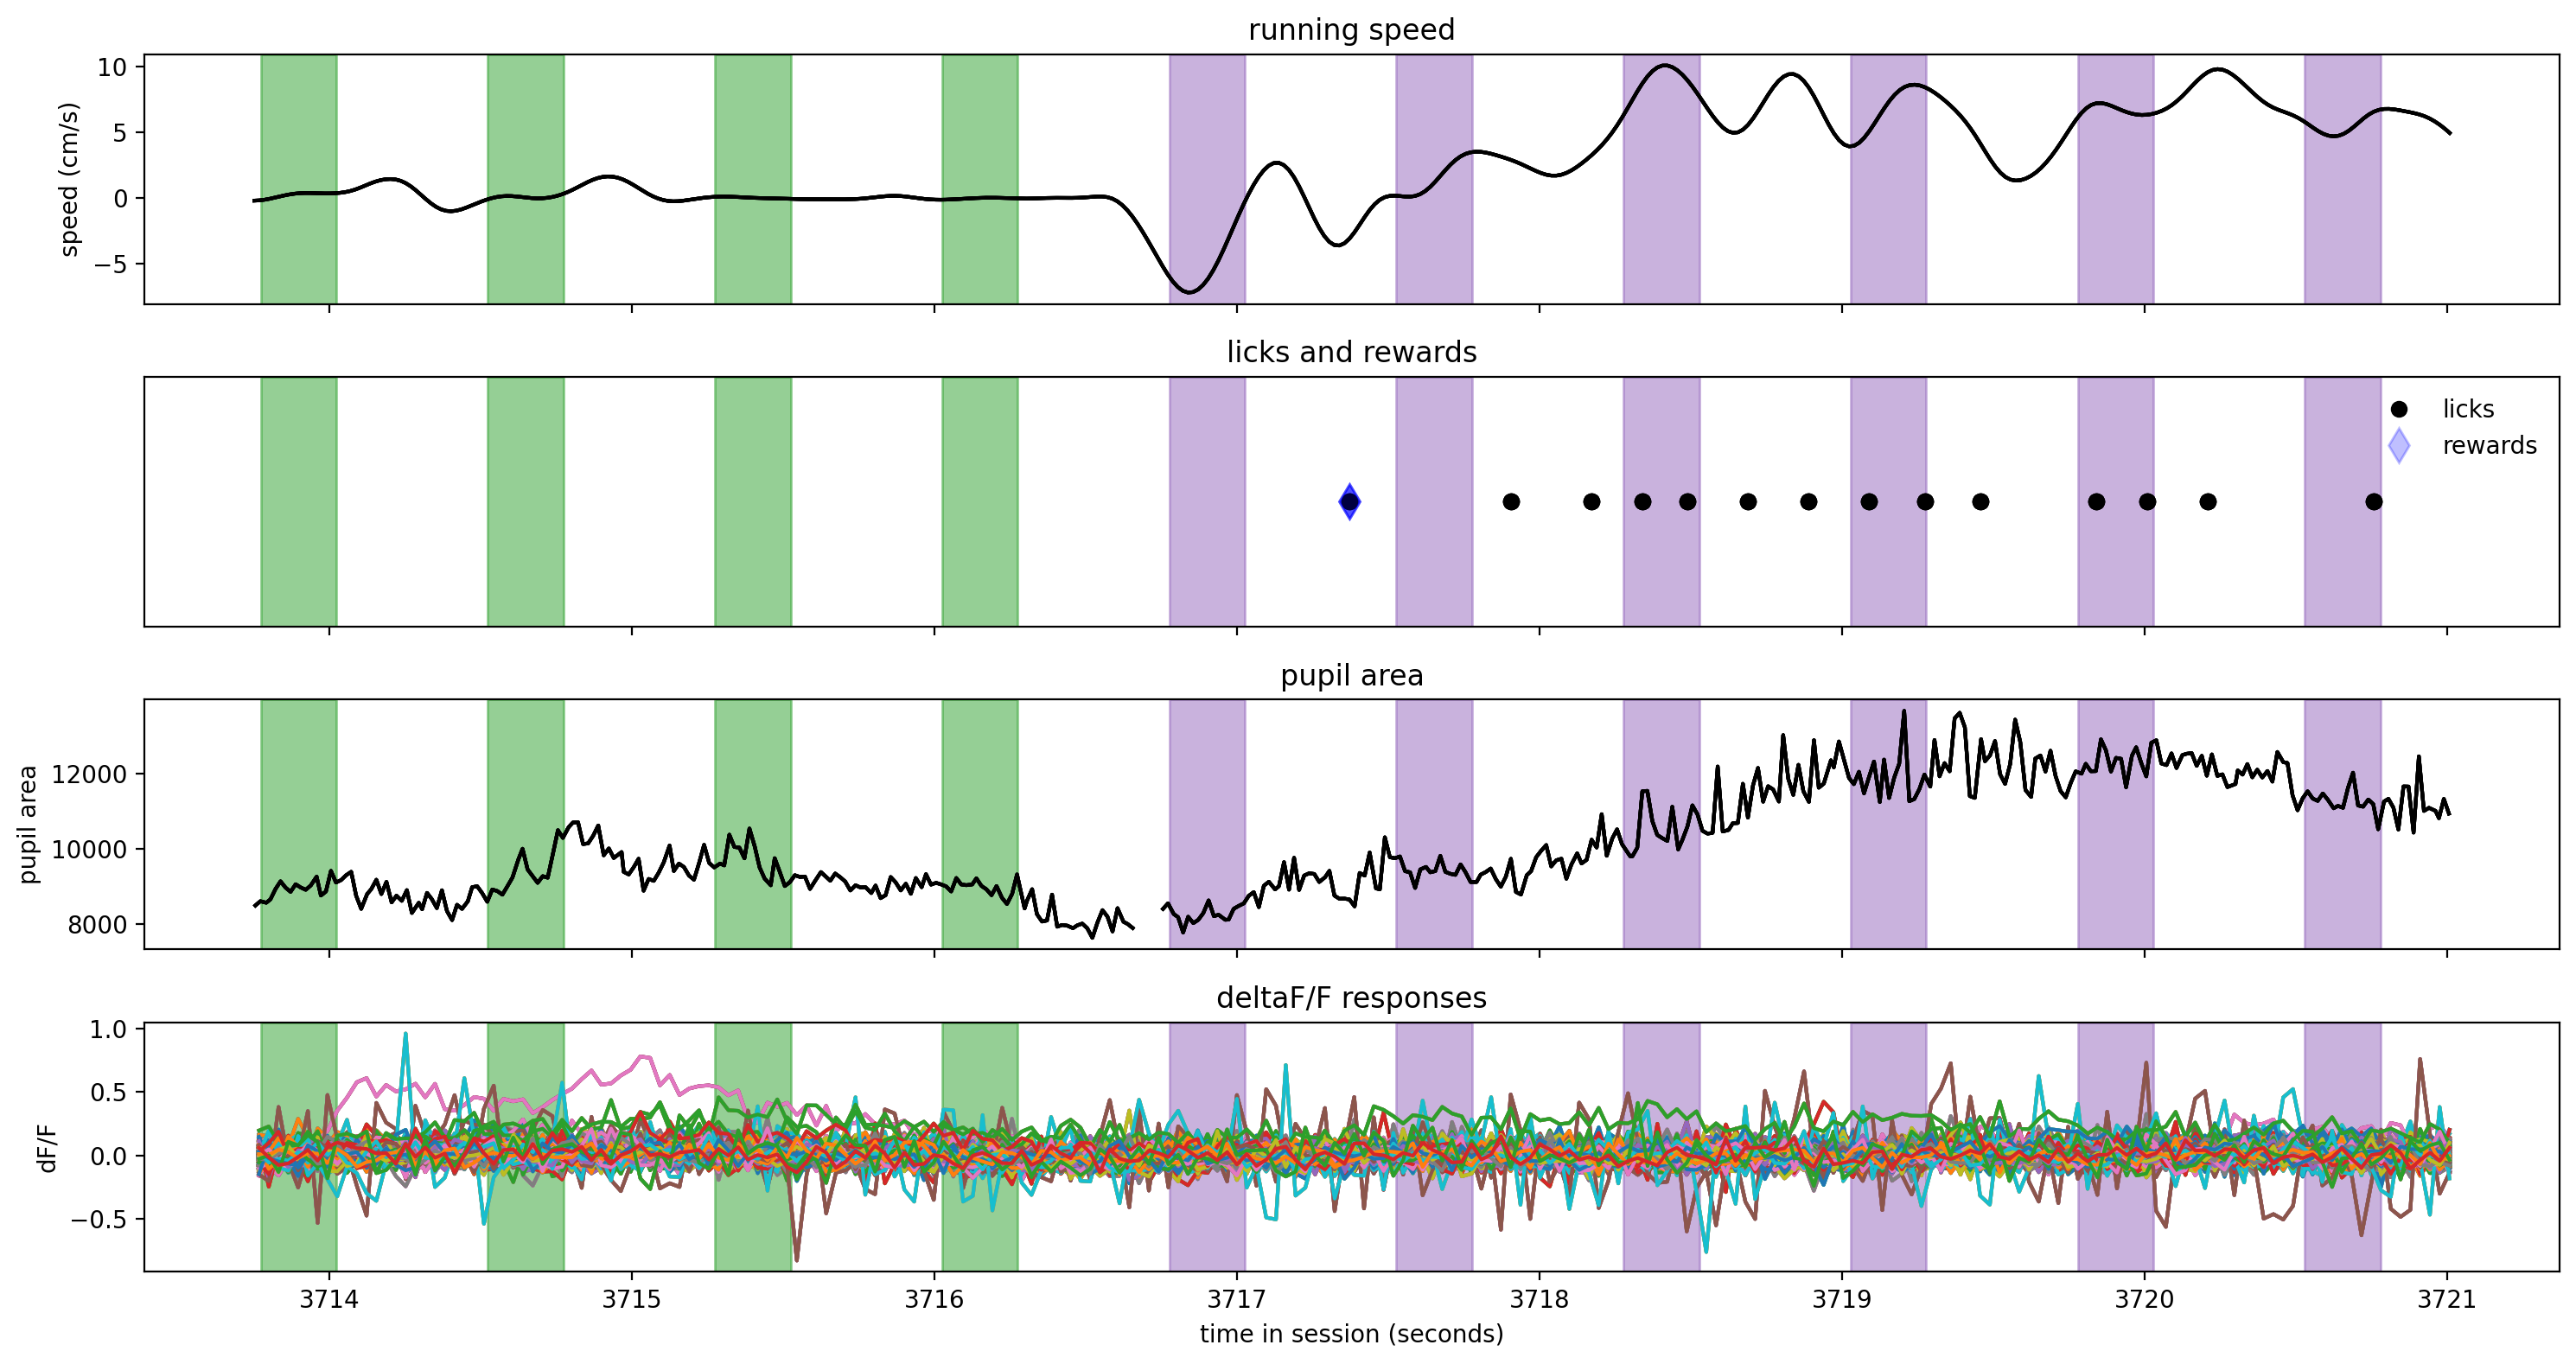

In [17]:
#@title Hidden Plotting Code
# Plotting hit trial
trial = experiment_dataset.trials.query('hit').sample(random_state = 12)
print('trial id chosen:', trial.index[0])

fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

for ax in axes:
  plot_stimuli(trial, ax)

  plot_running(trial, axes[0])
  axes[0].set_title('running speed')
  axes[0].set_ylabel('speed (cm/s)')

  plot_licks(trial, axes[1])
  plot_rewards(trial, axes[1])
  axes[1].set_title('licks and rewards')
  axes[1].set_yticks([])
  axes[1].legend(['licks','rewards'], frameon = False);

  plot_pupil(trial, axes[2])
  axes[2].set_title('pupil area')
  axes[2].set_ylabel('pupil area')

  plot_dff(trial, axes[3])
  axes[3].set_title('deltaF/F responses')
  axes[3].set_ylabel('dF/F')

  axes[3].set_xlabel('time in session (seconds)')
  fig.tight_layout()

In [18]:
trial

start_time   stop_time initial_image_name change_image_name  \
trials_id                                                                
464        3713.75139  3721.00733              im063             im066   

           is_change  change_time    go  catch  \
trials_id                                        
464             True  3716.775363  True  False   

                                                  lick_times  response_time  \
trials_id                                                                     
464        [3717.37101, 3717.90478, 3718.17166, 3718.3384...     3717.37101   

           response_latency  reward_time  reward_volume   hit  false_alarm  \
trials_id                                                                    
464                0.595647   3717.37101          0.007  True        False   

            miss  correct_reject  aborted  auto_rewarded  change_frame  \
trials_id                                                                
464        False           False    False          False        222465   

           trial_length  
trials_id                
464             7.25594

## Trialtype 2: What type of trial is this?

trial id chosen: 307


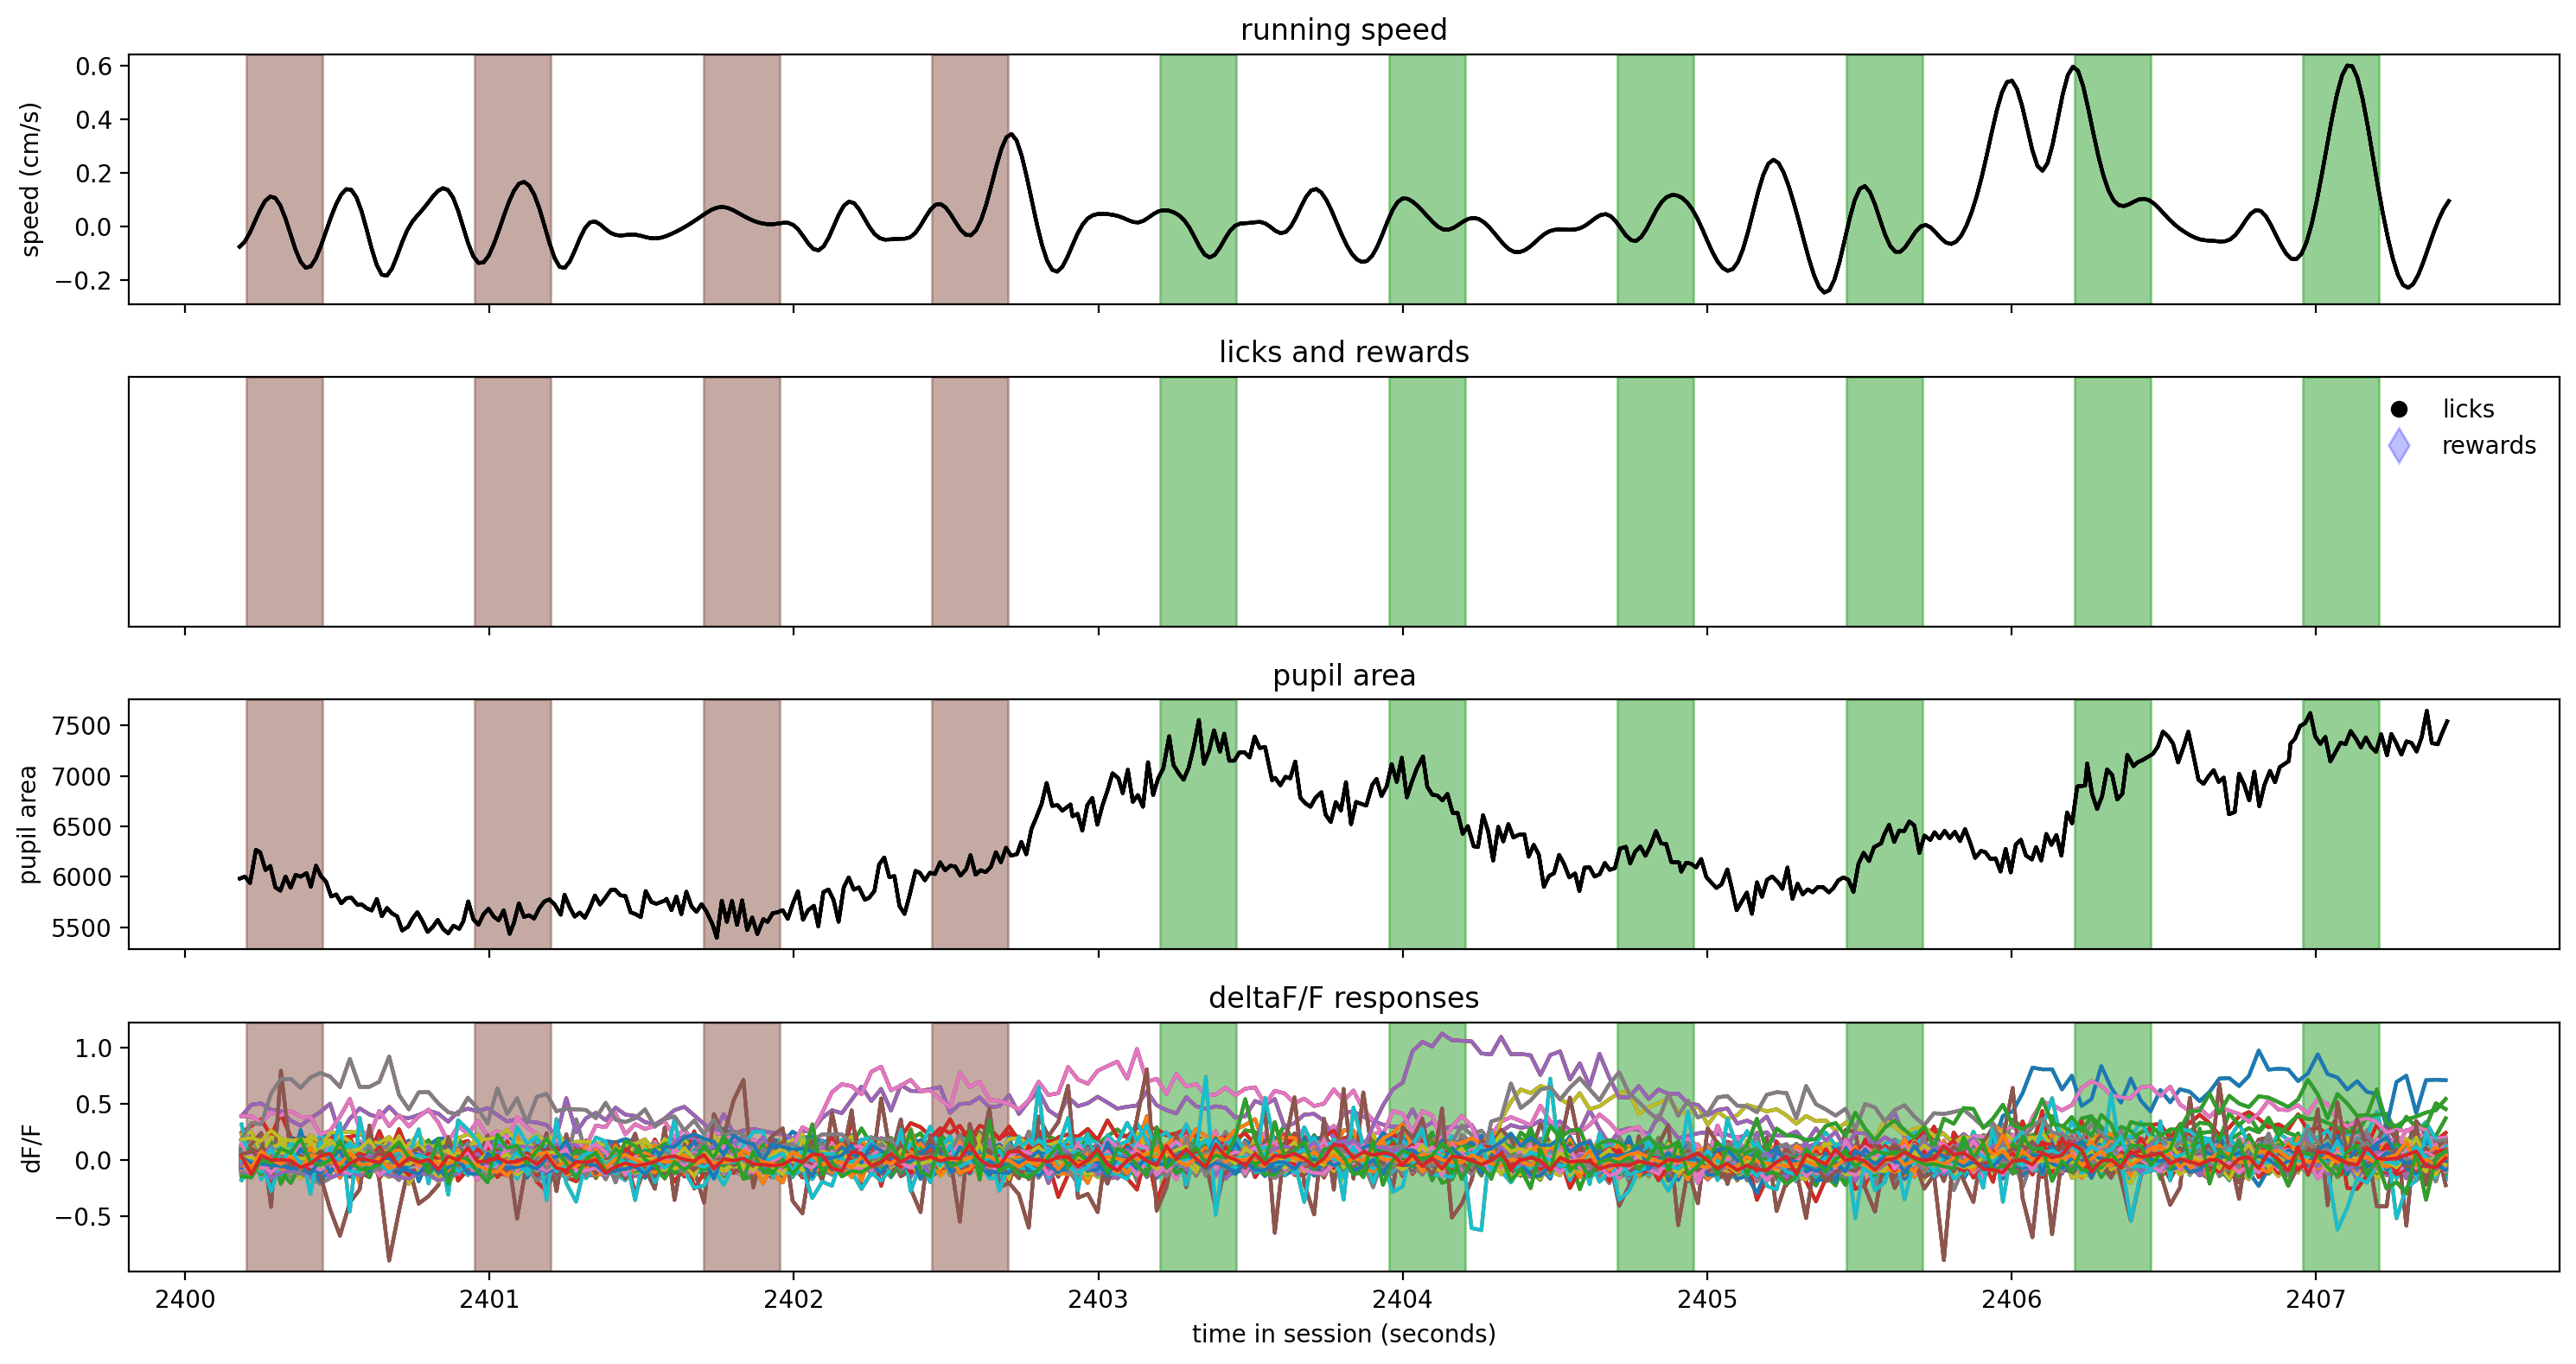

In [ ]:
#@title Hidden Plotting Code
trial = experiment_dataset.trials.query('miss').sample(random_state = 12)
print('trial id chosen:', trial.index[0])

fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

for ax in axes:
  plot_stimuli(trial, ax)

  plot_running(trial, axes[0])
  axes[0].set_title('running speed')
  axes[0].set_ylabel('speed (cm/s)')

  plot_licks(trial, axes[1])
  plot_rewards(trial, axes[1])
  axes[1].set_title('licks and rewards')
  axes[1].set_yticks([])
  axes[1].legend(['licks','rewards'], frameon = False);

  plot_pupil(trial, axes[2])
  axes[2].set_title('pupil area')
  axes[2].set_ylabel('pupil area')

  plot_dff(trial, axes[3])
  axes[3].set_title('deltaF/F responses')
  axes[3].set_ylabel('dF/F')

  axes[3].set_xlabel('time in session (seconds)')
  fig.tight_layout()

## Trialtype 3: What type of trial is this?

trial id chosen: 53


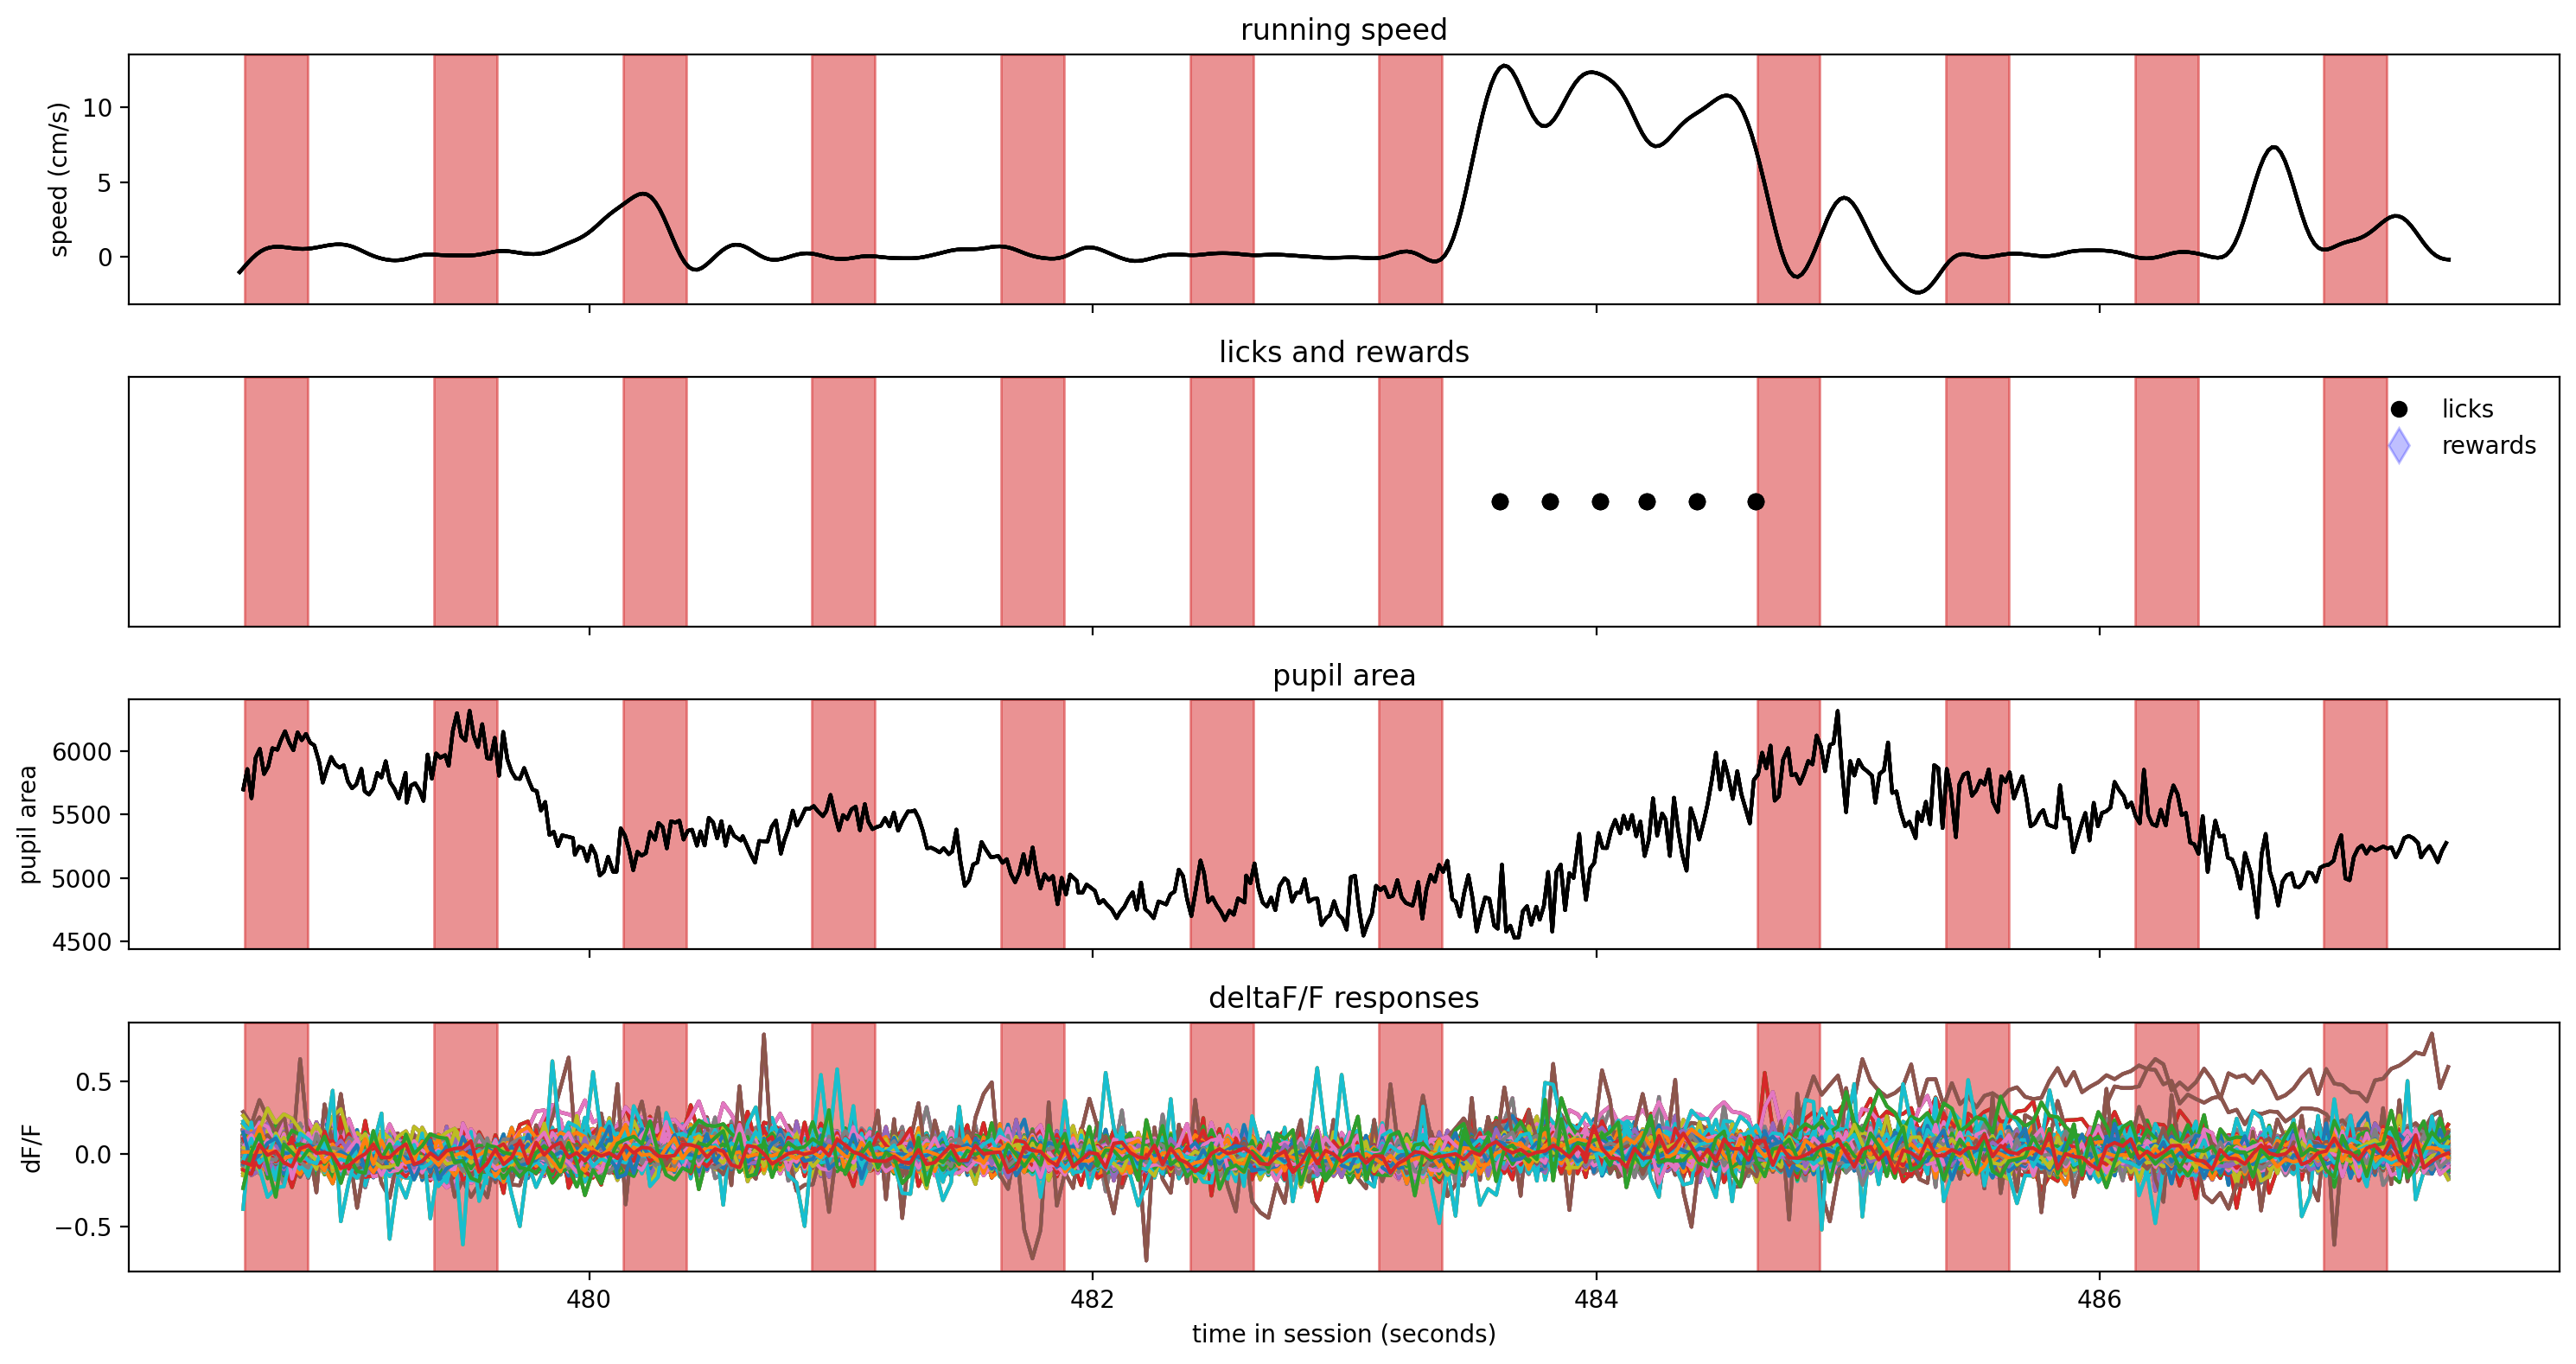

In [ ]:
#@title Hidden Plotting Code
trial = experiment_dataset.trials.query('false_alarm').sample(random_state = 12)
print('trial id chosen:', trial.index[0])

fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

for ax in axes:
  plot_stimuli(trial, ax)

  plot_running(trial, axes[0])
  axes[0].set_title('running speed')
  axes[0].set_ylabel('speed (cm/s)')

  plot_licks(trial, axes[1])
  plot_rewards(trial, axes[1])
  axes[1].set_title('licks and rewards')
  axes[1].set_yticks([])
  axes[1].legend(['licks','rewards'], frameon = False);

  plot_pupil(trial, axes[2])
  axes[2].set_title('pupil area')
  axes[2].set_ylabel('pupil area')

  plot_dff(trial, axes[3])
  axes[3].set_title('deltaF/F responses')
  axes[3].set_ylabel('dF/F')

  axes[3].set_xlabel('time in session (seconds)')
  fig.tight_layout()

## Trialtype 4: What type of trial is this?

trial id chosen: 366


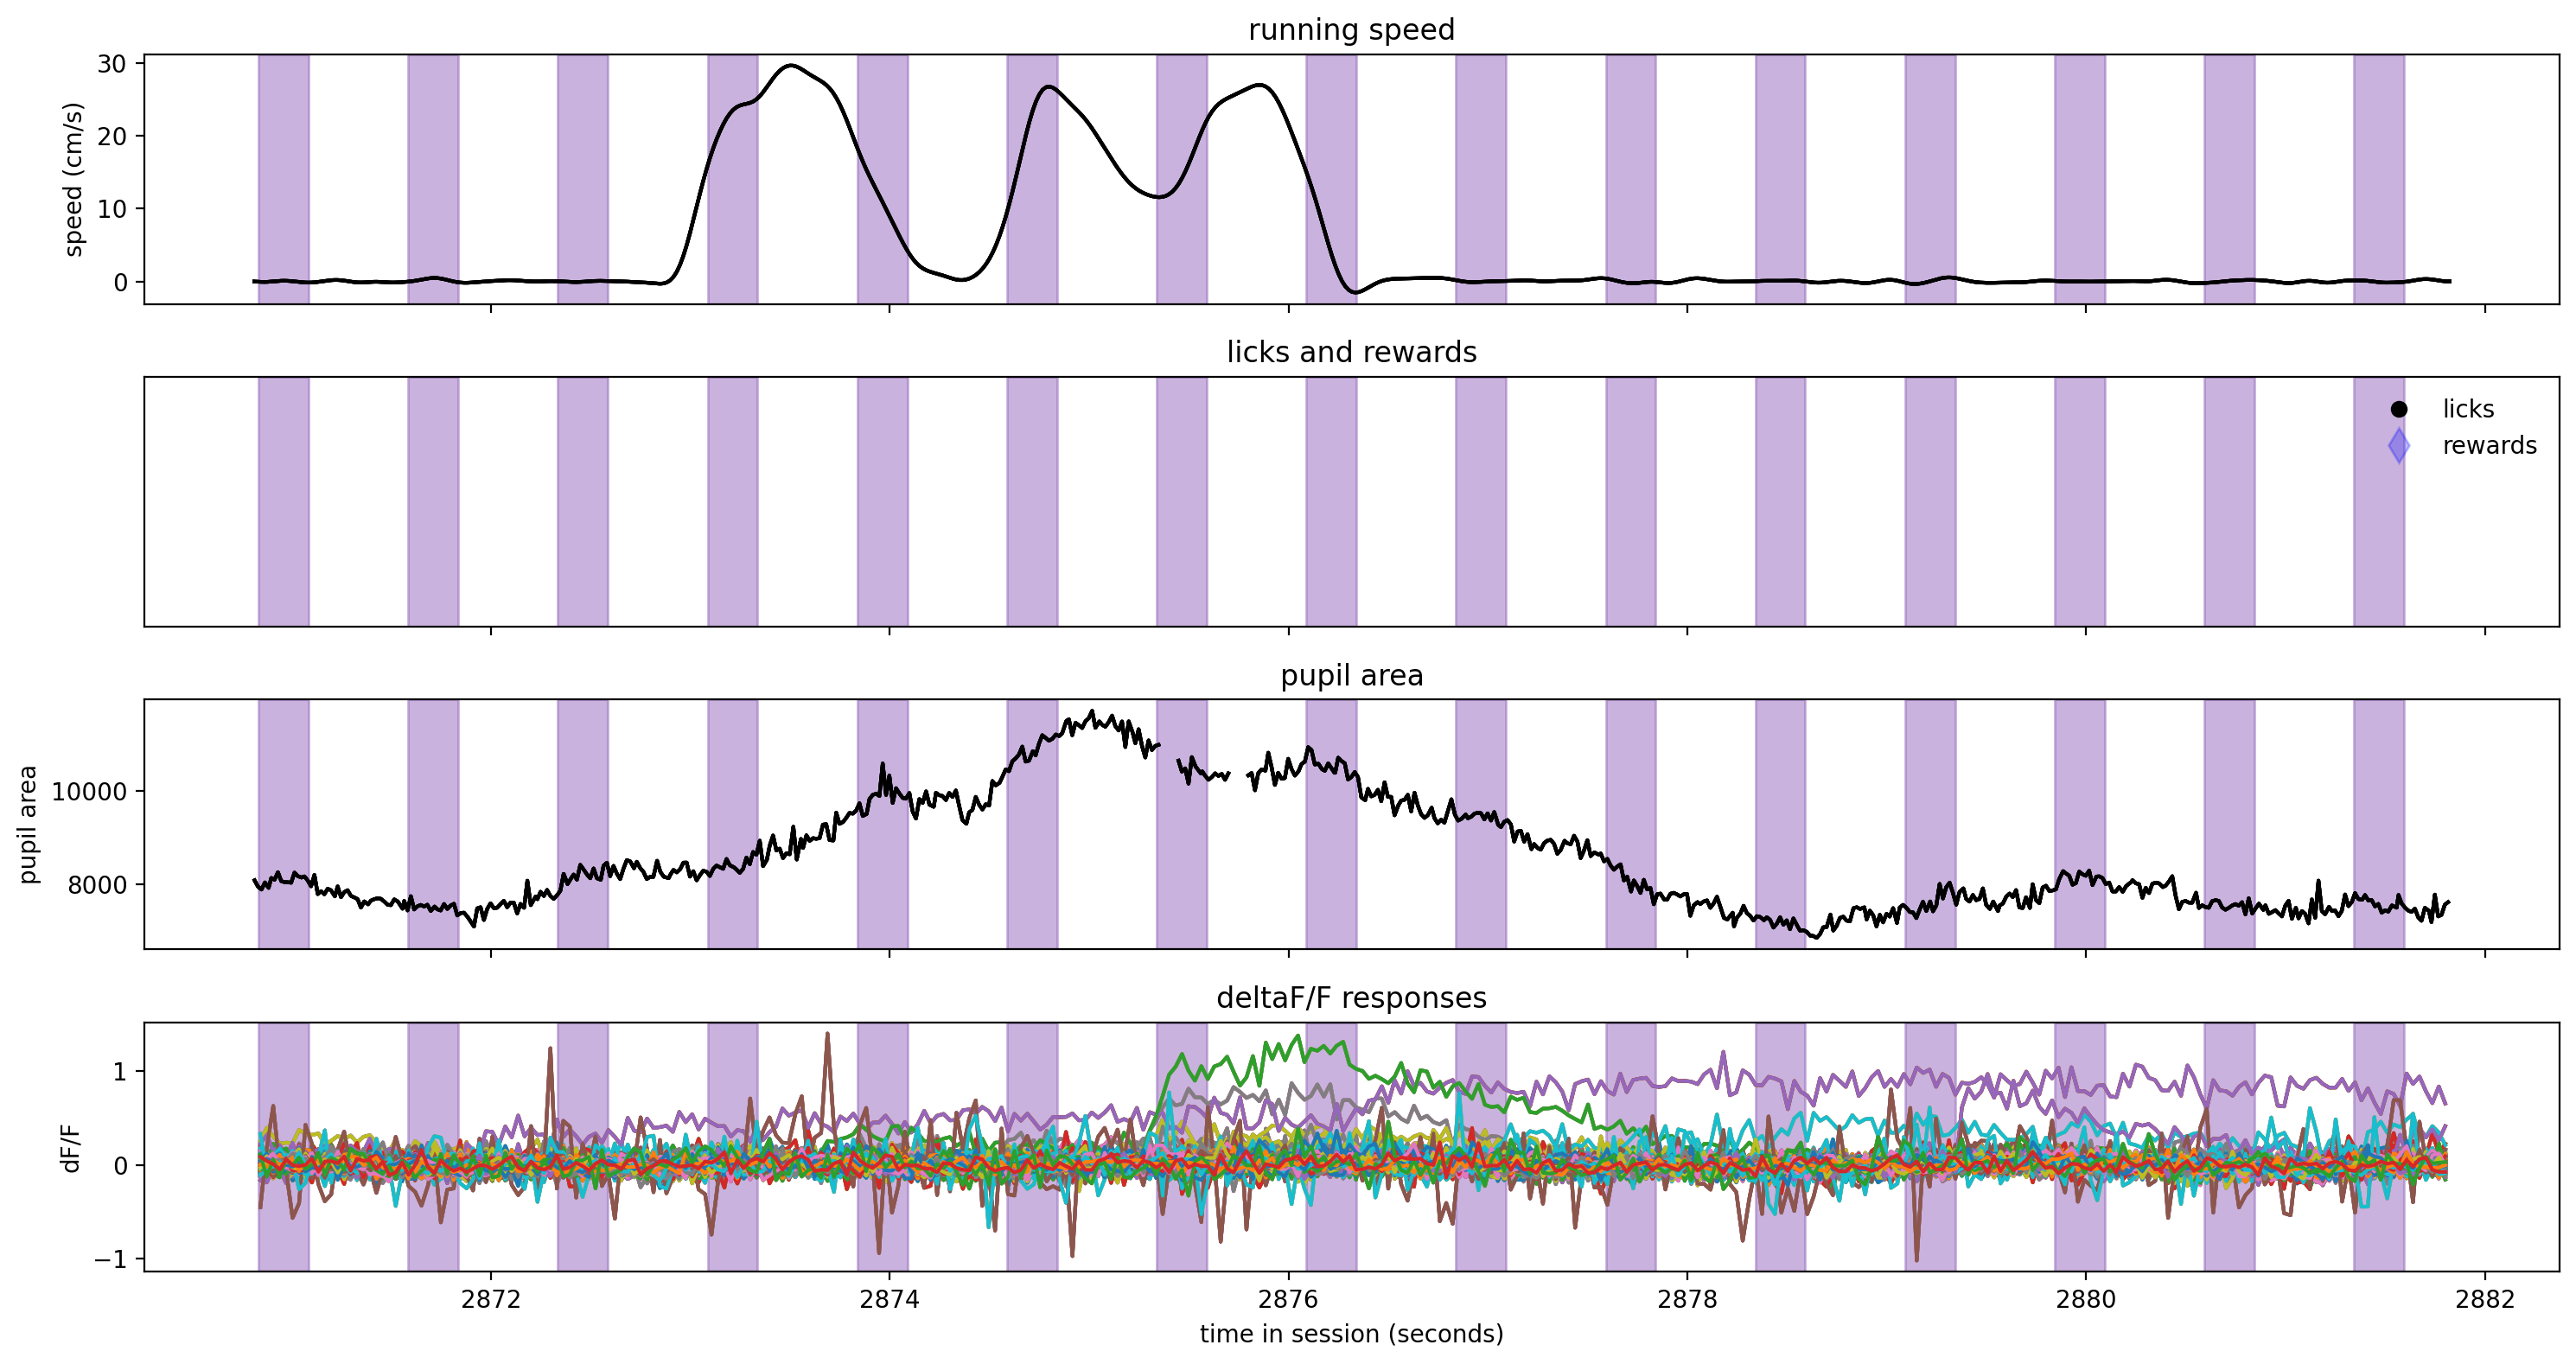

In [ ]:
#@title Hidden Plotting Code
trial = experiment_dataset.trials.query('correct_reject').sample(random_state = 12)
print('trial id chosen:', trial.index[0])

fig, axes = plt.subplots(4, 1, figsize = (15, 8), sharex=True)

for ax in axes:
  plot_stimuli(trial, ax)

  plot_running(trial, axes[0])
  axes[0].set_title('running speed')
  axes[0].set_ylabel('speed (cm/s)')

  plot_licks(trial, axes[1])
  plot_rewards(trial, axes[1])
  axes[1].set_title('licks and rewards')
  axes[1].set_yticks([])
  axes[1].legend(['licks','rewards'], frameon = False);

  plot_pupil(trial, axes[2])
  axes[2].set_title('pupil area')
  axes[2].set_ylabel('pupil area')

  plot_dff(trial, axes[3])
  axes[3].set_title('deltaF/F responses')
  axes[3].set_ylabel('dF/F')

  axes[3].set_xlabel('time in session (seconds)')
  fig.tight_layout()
